## Este proyecto es el de Microsoft Malware Prediction una competencia que se realizo años atrás, para poder predecir mejor cuales eran aquellos ordenadores mas propensos a infectarse
Aqui adjunto una descripción de ellos:

The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.

With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security.

As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

Can you help protect more than one billion machines from damage BEFORE it happens?


En este notebook está enfocado al tratamiento de cada una de las variables presentadas por el dataset de Microsoft para luego con los datos limpios y tratados pasarlos por un Decision Tree y obtener respuestas.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=c0541b7f70d382e73936d49c1cbcd3ad1d7226bd09f299d61f083a644e09b0d1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:

import folium

import wget
import os
import plotly.express as px

In [ ]:
df_mmp = '/content/drive/MyDrive/MASTER DS/ML. Supervisado/sample_mmp.csv'

In [ ]:
df_mmp = pd.read_csv(df_mmp)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (29,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#2.1 Analisis univariante de datos y limpieza de atributos

In [ ]:
def explore_cat_values(column, dataframe):
  return pd.pivot_table(data = dataframe, index = column, values = TARGET, aggfunc = [len, sum, np.mean]).sort_values(by = [("mean", TARGET)], ascending = False)

###2.1.1 Tamaño del dataset

In [ ]:
##Tenemos un dataset de 84 columnas y 500k filas donde cada fila representa un ordenador particular y unico
df_mmp.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


In [ ]:
df_mmp.drop('Unnamed: 0',axis=1, inplace=True)

###2.1.2 Visualizacion de los datos

In [ ]:
df_mmp.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,53447.0,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,53447.0,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,46781.0,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,53447.0,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,47238.0,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


###2.1.3 Tipos de atributos disponibles

In [ ]:
#VAMOS A VER CUALES SON LAS COLUMNAS NUMERICAS QUE EN TOTAL SON 
df_mmp.select_dtypes(include= np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 53 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   IsBeta                                             500000 non-null  int64  
 1   RtpStateBitfield                                   498168 non-null  float64
 2   IsSxsPassiveMode                                   500000 non-null  int64  
 3   DefaultBrowsersIdentifier                          24061 non-null   float64
 4   AVProductStatesIdentifier                          498062 non-null  float64
 5   AVProductsInstalled                                498062 non-null  float64
 6   AVProductsEnabled                                  498062 non-null  float64
 7   HasTpm                                             500000 non-null  int64  
 8   CountryIdentifier                                  500000 non-null  int64 

In [ ]:
#VEMOS LAS COLUMNAS CATEGORICAS QUE SON 
df_mmp.select_dtypes(exclude= np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   MachineIdentifier                 500000 non-null  object
 1   ProductName                       500000 non-null  object
 2   EngineVersion                     500000 non-null  object
 3   AppVersion                        500000 non-null  object
 4   AvSigVersion                      500000 non-null  object
 5   Platform                          500000 non-null  object
 6   Processor                         500000 non-null  object
 7   OsVer                             500000 non-null  object
 8   OsPlatformSubRelease              500000 non-null  object
 9   OsBuildLab                        499999 non-null  object
 10  SkuEdition                        500000 non-null  object
 11  PuaMode                           126 non-null     object
 12  Sm

##2.1.4 Estadistica descriptiva

#####Dejo seteado el índice del dataframe

In [ ]:
df_mmp.set_index('MachineIdentifier', inplace = True)

###Sobre columnas numericas

In [ ]:
df_mmp.select_dtypes(include= np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02
CityIdentifier,481760.0,8.127165e+04,4.898513e+04,7.0,36825.00,82373.0,1.239395e+05,1.679580e+05


In [ ]:
num_values = df_mmp.select_dtypes(include= np.number).describe().T

###Descriptiva para variables categoricas

In [ ]:
df_mmp.select_dtypes(exclude= np.number).describe().T

,count,unique,top,freq
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436
SkuEdition,500000,8,Home,308567


In [ ]:
cat_values = df_mmp.select_dtypes(exclude= np.number).describe().T

In [ ]:
df_mmp.columns.nunique(dropna = False) == 1

False

##2.1.5 Determinacion de nulos

In [ ]:
df_mmp.select_dtypes(include = np.number).isnull().sum()

IsBeta                                                    0
RtpStateBitfield                                       1832
IsSxsPassiveMode                                          0
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
AutoSampleOptIn                         

In [ ]:
#CUENTO LA CANTIDAD DE NULOS QUE HAY EN LAS COLUMNAS
df_mmp.select_dtypes(exclude = np.number).isnull().sum()

ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
PuaMode                             499874
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEdition                         0
Census_OSSk

In [ ]:
#HAGO UN LOOP QUE ME PERMITA VER CUALES SON LAS COLUMNAS QUE TIENEN UN PORCENTAJE DE DATOS NULOS MENOR AL 70% Y ANALIZO LOS DATOS CON EL TARGET  PARA SABER SI REALMENTE LAS PUEDO ELIMINAR O NO
for column in df_mmp.columns:
  nan_pr = df_mmp[column].isna().sum()/df_mmp[column].size *100
  if nan_pr > 70:
     print(column)
     print(nan_pr)

DefaultBrowsersIdentifier
95.1878
PuaMode
99.9748
Census_ProcessorClass
99.5836
Census_InternalBatteryType
71.1206
Census_IsFlightingInternal
83.045


In [ ]:
df_mmp['DefaultBrowsersIdentifier'].value_counts()

239.0     2589
3195.0    2423
1632.0    1601
3176.0    1313
146.0     1231
          ... 
2285.0       1
2100.0       1
2459.0       1
2196.0       1
1427.0       1
Name: DefaultBrowsersIdentifier, Length: 554, dtype: int64

In [ ]:
#ELIMINO ESTAS COLUMNAS
for column in df_mmp.columns:
  nan_pr = df_mmp[column].isna().sum()/df_mmp[column].size *100
  if nan_pr > 80:
   df_mmp.drop(column, axis=1, inplace=True)

In [ ]:
df_mmp.shape

(500000, 78)

##2.1.6 Distribución del target

In [ ]:
#Genero una nueva variable con la columna Hasdetections que es el target
TARGET = 'HasDetections'

In [ ]:
#Observo que el target efectivamente esta constituido por valores numericos de 0 y 1, donde 1 es que ha detectado un malware y 0 que no.
df_mmp[TARGET].head(10)

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    1
fd5ba6f5b75325ec0423a6c67cc75942    0
4e628391e7cc7c482fb3286f486dbd25    0
270a2e9d028144a4df12a9e3da79fba5    1
06ca8fa8d32c2abdc5b3577d676b3269    1
6c3ff3036d3ecc96729a615653742608    1
8ab73b7f8dbb0d0d57f54a8b4799e960    0
1c4ec21828b563afb6b0aa72ef88926d    1
0b247aa88737776d0f88ce4dee447216    0
cc9e1141a127a305cddc17baaa36bcb3    1
Name: HasDetections, dtype: int64

In [ ]:
#Cuento cuantos datos hay en dicha columna
df_mmp[TARGET].count()

500000

In [ ]:
df_mmp[TARGET].value_counts()

0    250047
1    249953
Name: HasDetections, dtype: int64

In [ ]:
#Saco la estadistica descriptiva de los valores
df_mmp[TARGET].describe()

count    500000.000000
mean          0.499906
std           0.500000
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HasDetections, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


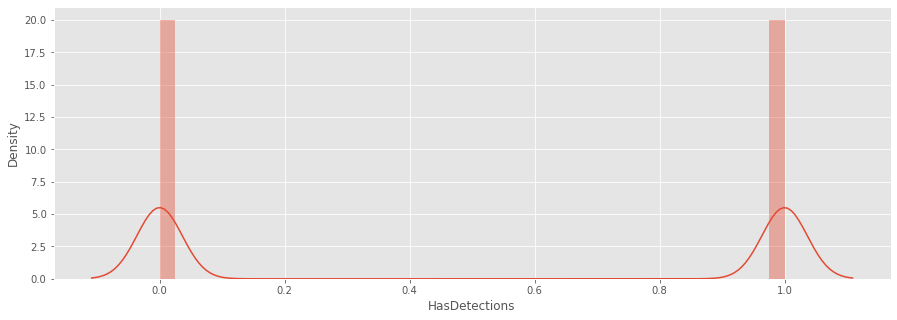

In [ ]:
#HAGO UN PLOT DEL TARGET Y TAMBIEN SE VE QUE HAY UNA DISTRIBUCION BASTANTE EQUITATIVA ENTRE LAS DETECCIONES DE MALWARE
plt.figure(figsize = (15,5))

sns.distplot(df_mmp[TARGET])

##2.2.7 Correlacion de variables con el TARGET

In [ ]:
df_mmp_description = df_mmp.describe(include = 'all').T

In [ ]:
#from google.colab import files
#df_mmp_description.to_excel('df_mmp_description_ds2111.xlsx')
#files.download('df_mmp_description_ds2111.xlsx')

##Variables Categoricas

#####Para las variables categoricas decidi dividirlas en aquellas que son nominales, es decir que no tienen un orden intrinseco y ordinales que son las que si lo tienen.

In [ ]:
#ESTA FUNCION ES PARA OBTENER EL NUMERO QUE IRA EN LA FUNCION SET OTHERS, ESTE NUMERO REPRESENTARA LA CANTIDAD DE COLUMNAS QUE QUEDARAN POR VARIABLE, SE AGRUPARAN LAS MINORITARIAS QUE TENGAN MENOS DE UN 1% DE LOS DATOS 
def get_num_values(df, column):
 num_values = 0
 pct_acumulado = 0
 for value in df[column].value_counts(): 
  pct_acumulado += value / df[column].value_counts().sum()*100
  if value / df[column].value_counts().sum()*100 < 1:
    return num_values
  num_values+= 1

In [ ]:
#ESTA FUNCION ES LA QUE CREAMOS PARA UTILIZAR SOLO LAS ETIQUETAS QUE TENGAN MAYORES DATOS Y PONER 
#AQUELLOS CON DATOS MENOS SIGNIFICANTES EN OTHERS
def set_Other(dataframe, column, num_values, nombre_others = 'Others' ):
  top_cat_values = dataframe[column].value_counts().head(num_values)
  top_cat_values_list = top_cat_values.index.to_list()
  top_cat_values_list.append(nombre_others)
  dataframe[column] = pd.Categorical(dataframe[column], categories = top_cat_values_list)
  return dataframe[column].fillna(nombre_others)

##CATEGORICAS NOMINALES

###ProductName

In [ ]:
df_mmp['ProductName'].value_counts(dropna=False)

win8defender     494604
mse                5395
mseprerelease         1
Name: ProductName, dtype: int64

In [ ]:
df_mmp['ProductName'].replace('mseprerelease', 'mse', inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


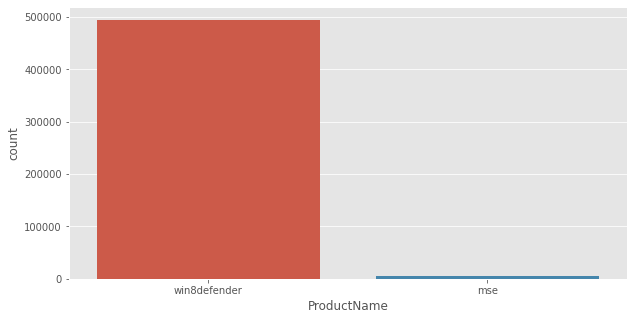

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['ProductName'])

###Platform

In [ ]:
df_mmp['Platform'].value_counts()

windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: Platform, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

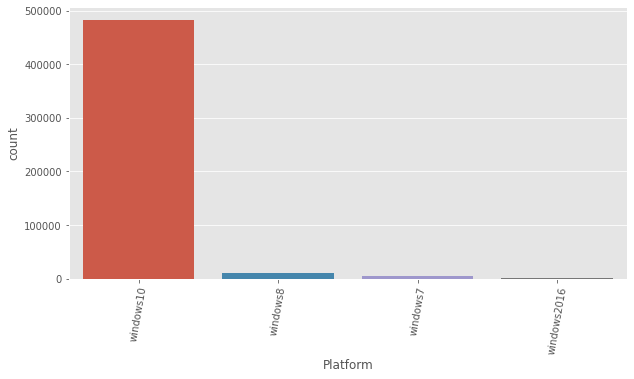

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Platform'])
plt.xticks(rotation=80)

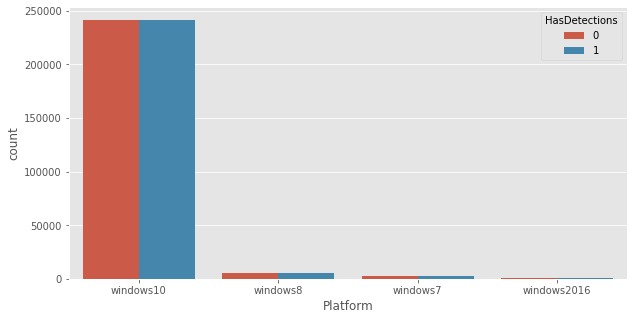

In [ ]:
#PLOTEAMOS LA VARIABLE VS EL TARGET Y VEMOS QUE HAY UNA DISTRIBUCION BASTANTE EQUITATIVA
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'Platform', hue = TARGET)

In [ ]:
#ESTA VARIABLE NOS INDICA QUE TIPO DE WINDOWS TIENE EL USUARIO POR LO QUE MAS ADELANTE PODRIA CORRELACIONARLA CON LAS VARIABLES OSVERSION
# Y DEFENDER PARA VER COMO FUNCIONAN JUNTAS, SI BRINDAN O NO LA MISMA INFORMACION

###OsPlatformSubRelease

In [ ]:
df_mmp['OsPlatformSubRelease'].value_counts()

rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: OsPlatformSubRelease, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

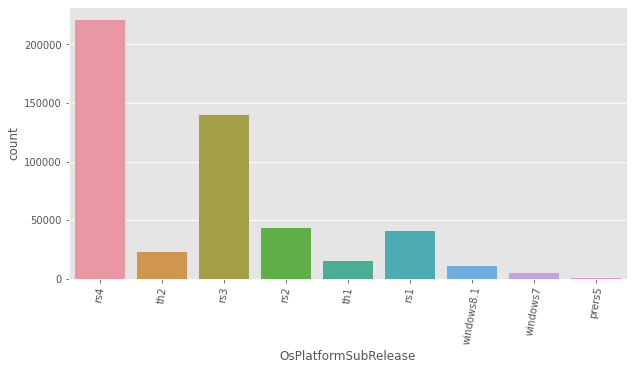

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['OsPlatformSubRelease'])
plt.xticks(rotation=80)

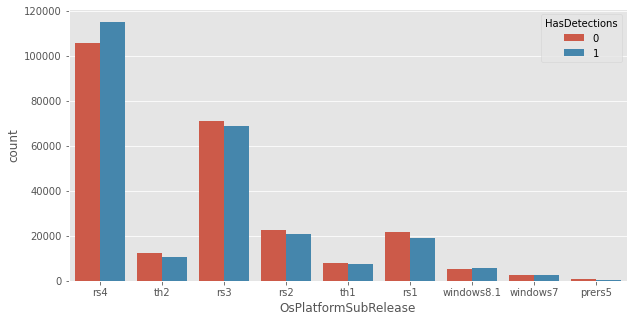

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'OsPlatformSubRelease', hue = TARGET)

In [ ]:
#BAJO EL CRITERIO QUE VENIMOS SIGUIENDO DEL PORCENTAJE DE VALORES POR ETIQUETA ESTA VARIABLE LA DEJARE COMO ESTA
#parece importante porque hay muchas variaciones

###OsBuildLab

In [ ]:
df_mmp['OsBuildLab'].value_counts()

17134.1.amd64fre.rs4_release.180410-1804                 206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     69884
16299.15.amd64fre.rs3_release.170928-1534                 53826
15063.0.amd64fre.rs2_release.170317-1834                  39908
17134.1.x86fre.rs4_release.180410-1804                    14334
                                                          ...  
17604.1000.amd64fre.rs_prerelease.180209-1422                 1
9600.17041.amd64fre.winblue_gdr.140305-1710                   1
9600.18146.x86fre.winblue_ltsb.151121-0600                    1
18214.1000.amd64fre.rs_prerelease.180803-1553                 1
9600.18007.amd64fre.winblue_ltsb.150807-0612                  1
Name: OsBuildLab, Length: 453, dtype: int64

In [ ]:
#VEMOS QUE ES UNA VARIABLE CON MAS DE 400 ETIQUETAS Y MUCHAS DE ELLAS CON UN SOLO VALOR, TAMBIEN SE HACE UN SET OTHERS

In [ ]:
df_mmp['OsBuildLab'] = set_Other(df_mmp, 'OsBuildLab', get_num_values(df_mmp, 'OsBuildLab'))

In [ ]:
df_mmp['OsBuildLab'].value_counts()

17134.1.amd64fre.rs4_release.180410-1804                 206436
Others                                                    73860
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     69884
16299.15.amd64fre.rs3_release.170928-1534                 53826
15063.0.amd64fre.rs2_release.170317-1834                  39908
17134.1.x86fre.rs4_release.180410-1804                    14334
16299.15.x86fre.rs3_release.170928-1534                   13105
14393.2189.amd64fre.rs1_release.180329-1711               10724
10240.17443.amd64fre.th1.170602-2340                       9538
10586.1176.amd64fre.th2_release_sec.170913-1848            8385
Name: OsBuildLab, dtype: int64

In [ ]:
df_mmp['OsBuildLab'].isna().sum()

0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

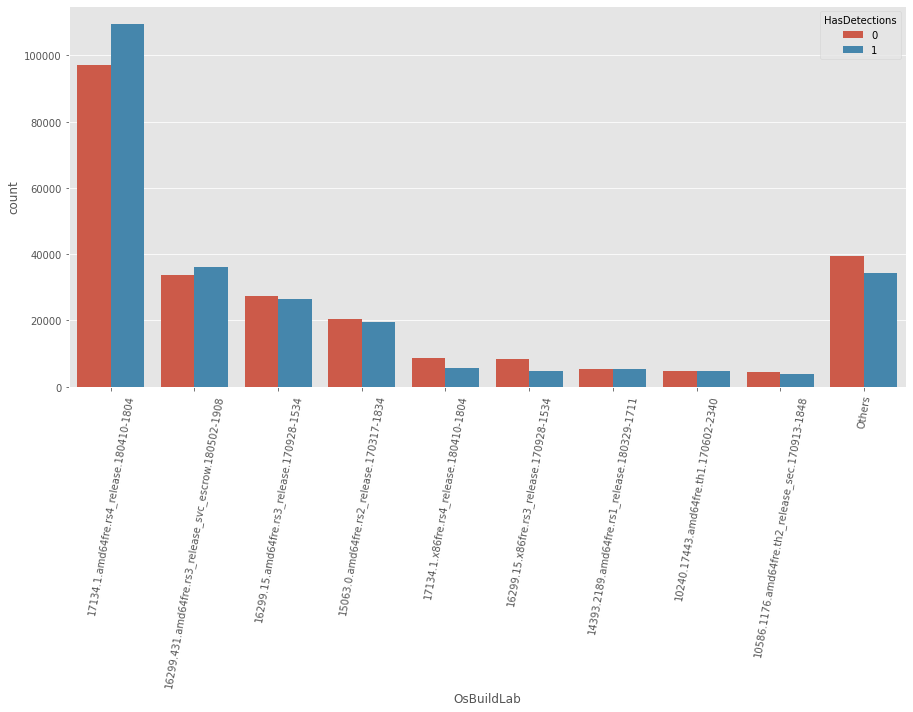

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'OsBuildLab', hue = TARGET)
plt.xticks(rotation=80)

###Census_MDC2FormFactor

In [ ]:
df_mmp['Census_MDC2FormFactor'].isnull().sum()

0

In [ ]:
df_mmp['Census_MDC2FormFactor'] = set_Other(df_mmp, 'Census_MDC2FormFactor', get_num_values(df_mmp, 'Census_MDC2FormFactor'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

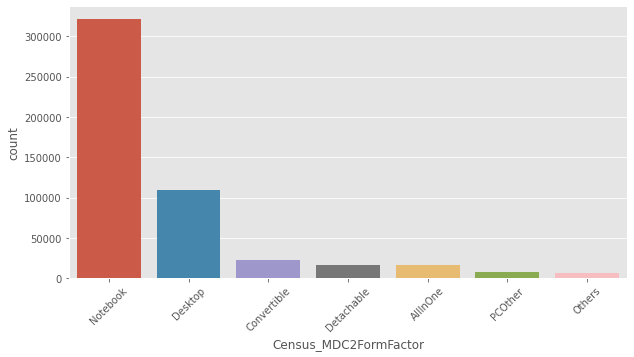

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_MDC2FormFactor'])
plt.xticks(rotation=45)

In [ ]:
#TOMARE LAS ETIQUETAS SMALLTABLET Y LARGETABLET PARA HACERLAS UNA SOLA
df_mmp['Census_MDC2FormFactor'].replace('SmallTablet', 'LargeTablet', inplace= True)

In [ ]:
df_mmp['Census_MDC2FormFactor'].replace('LargeTablet', 'Tablet', inplace= True)

In [ ]:
df_mmp['Census_MDC2FormFactor'].value_counts()

Notebook       320948
Desktop        109527
Convertible     22369
Detachable      16802
AllInOne        16372
PCOther          7800
Others           6182
Name: Census_MDC2FormFactor, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

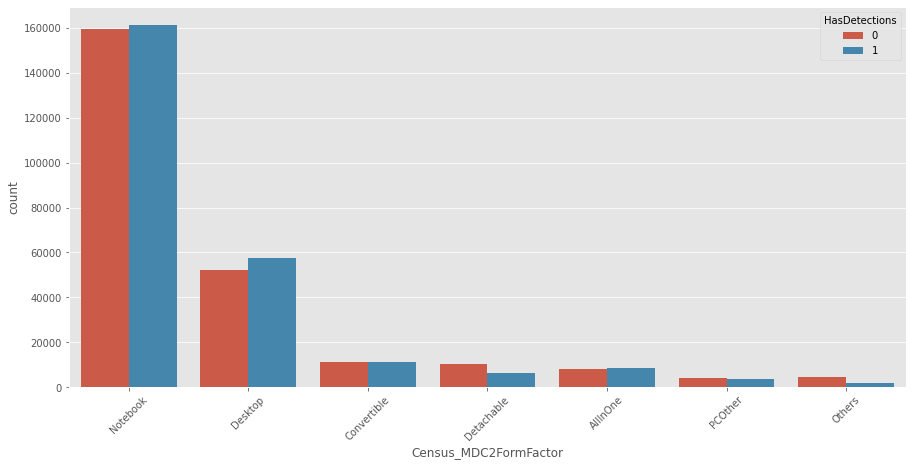

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_MDC2FormFactor', hue = TARGET)
plt.xticks(rotation=45)

###Census_DeviceFamily

In [ ]:
df_mmp['Census_DeviceFamily'].value_counts(dropna=False)

Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: Census_DeviceFamily, dtype: int64

In [ ]:
df_mmp['Census_DeviceFamily'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

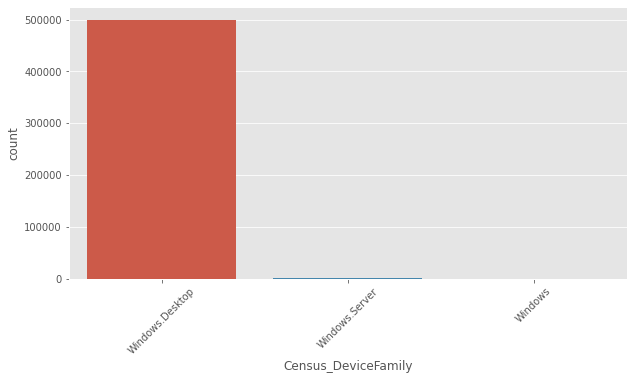

In [ ]:
#ESTA VARIABLE TIENE UNA SOLA ETIQUETA MAYORITARIA POR LO QUE CONSIDERO QUE NO SERA RELEVANTE EN EL DECISION TREE Y LA ELIMINARE
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_DeviceFamily'])
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

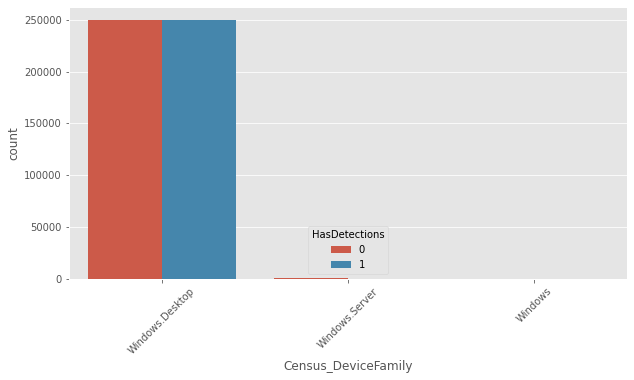

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'Census_DeviceFamily', hue = TARGET)
plt.xticks(rotation=45)

In [ ]:
df_mmp.drop('Census_DeviceFamily',axis=1, inplace=True)

###SkuEdition

In [ ]:
df_mmp['SkuEdition'].value_counts(dropna=False)

Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: SkuEdition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

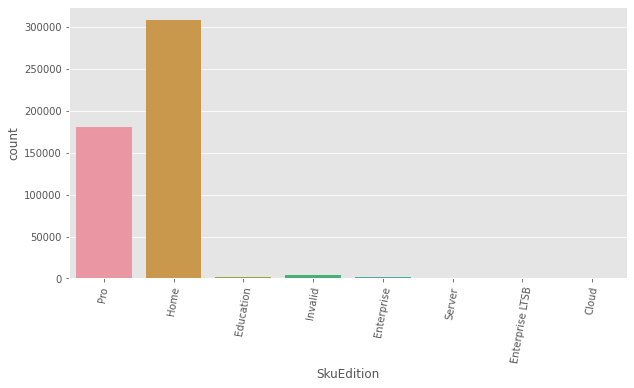

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['SkuEdition'])
plt.xticks(rotation=80)

In [ ]:
#SIGUIENDO LA MISMA LINEA, VEMOS QUE SI BIEN SON POCAS ETIQUETAS (8), AL MENOS 6 TIENEN MUY POCA CANTIDAD DE DATOS, POR LO QUE USAREMOS UN SET OTHERS TAMBIEN

In [ ]:
df_mmp['SkuEdition'] = set_Other(df_mmp, 'SkuEdition', get_num_values(df_mmp, 'SkuEdition'))

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

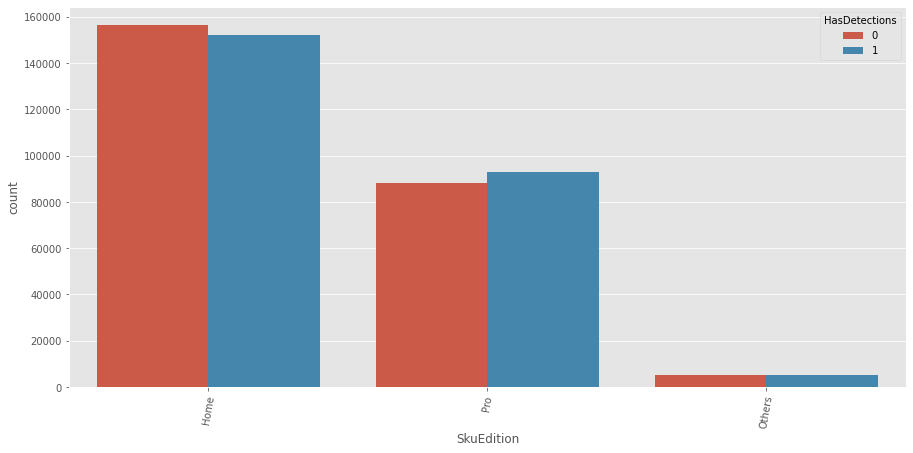

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'SkuEdition', hue = TARGET)
plt.xticks(rotation=80)

###Census_PrimaryDiskTypeName

In [ ]:
df_mmp['Census_PrimaryDiskTypeName'].value_counts()

HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: Census_PrimaryDiskTypeName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

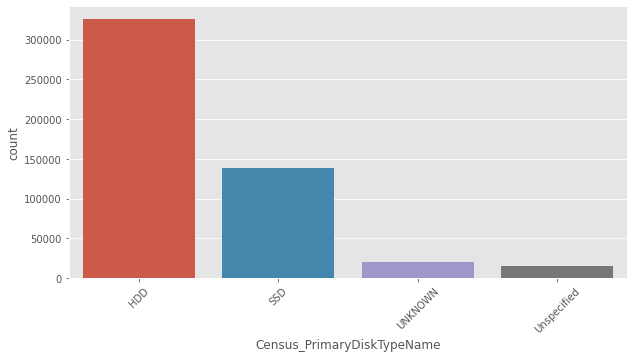

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_PrimaryDiskTypeName'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

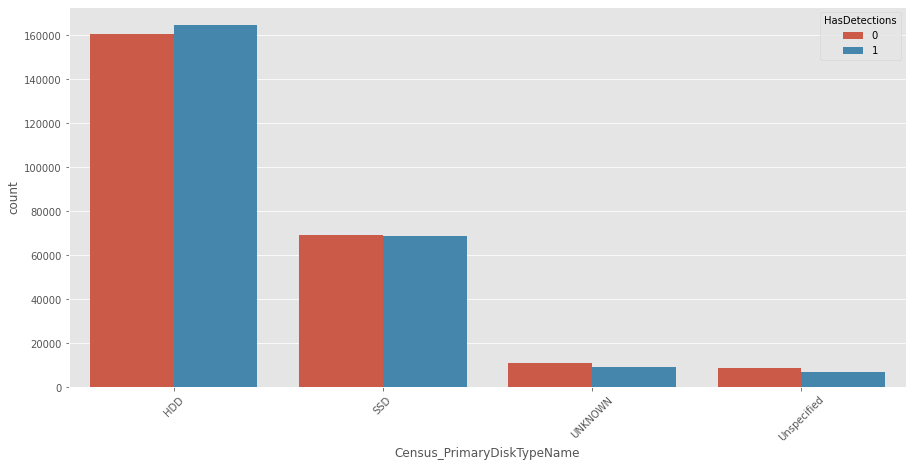

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_PrimaryDiskTypeName', hue = TARGET)
plt.xticks(rotation=45)

In [ ]:
df_mmp['Census_PrimaryDiskTypeName'].replace('UNKNOWN', 'Others', inplace= True)

In [ ]:
df_mmp['Census_PrimaryDiskTypeName'].replace('Unspecified', 'Others', inplace= True)

In [ ]:
#Como tiene nulos, las pondre en others tambien
df_mmp['Census_PrimaryDiskTypeName'].isna().sum()

709

In [ ]:
df_mmp['Census_PrimaryDiskTypeName'].fillna('Others', inplace = True)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

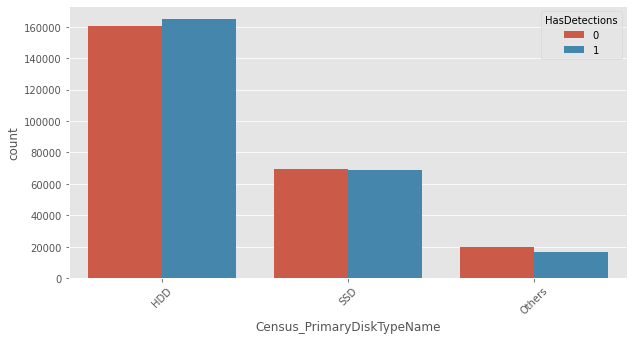

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'Census_PrimaryDiskTypeName', hue = TARGET)
plt.xticks(rotation=45)

###Census_ChassisTypeName

In [ ]:
df_mmp['Census_ChassisTypeName'].value_counts(dropna=False)

Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionC

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

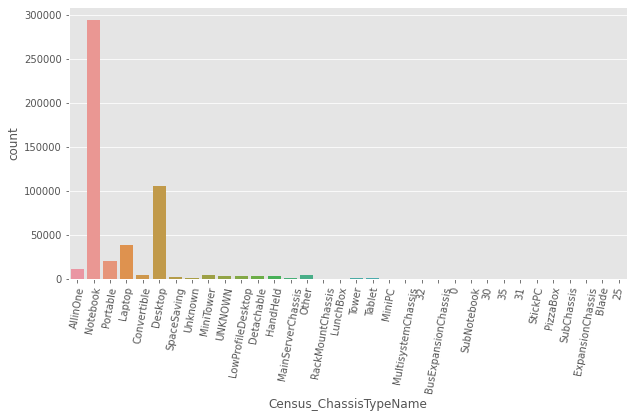

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ChassisTypeName'])
plt.xticks(rotation=80)

In [ ]:
df_mmp['Census_ChassisTypeName'] = set_Other(df_mmp, 'Census_ChassisTypeName', get_num_values(df_mmp, 'Census_ChassisTypeName'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

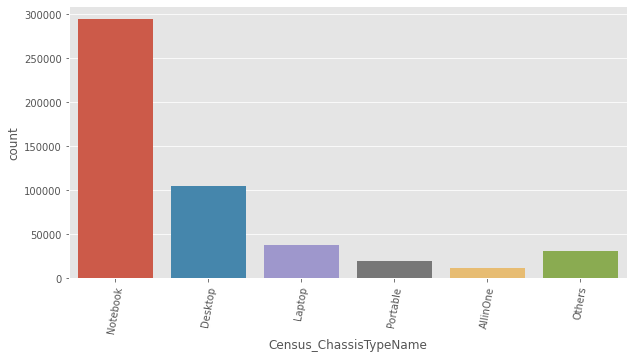

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ChassisTypeName'])
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

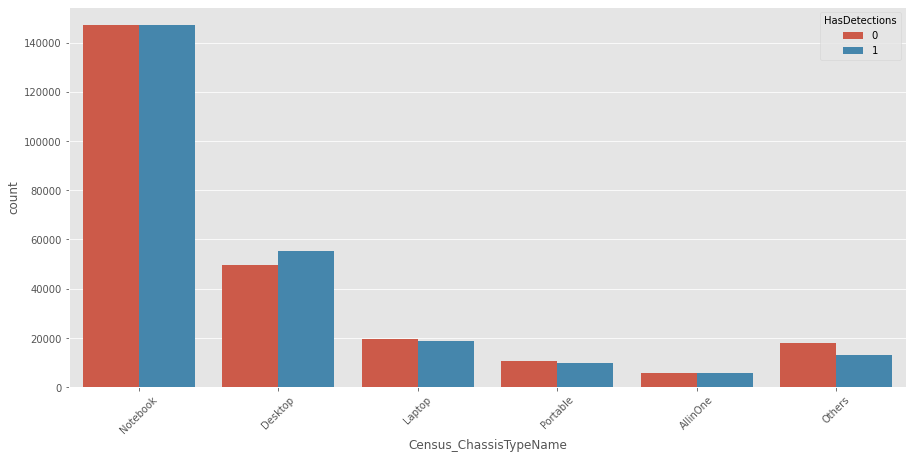

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_ChassisTypeName', hue = TARGET)
plt.xticks(rotation=45)

In [ ]:
df_mmp['Census_PrimaryDiskTypeName'].isna().sum()

0

###Census_PowerPlatformRoleName

In [ ]:
df_mmp['Census_PowerPlatformRoleName'].value_counts(dropna=False)

Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
NaN                       2
Name: Census_PowerPlatformRoleName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

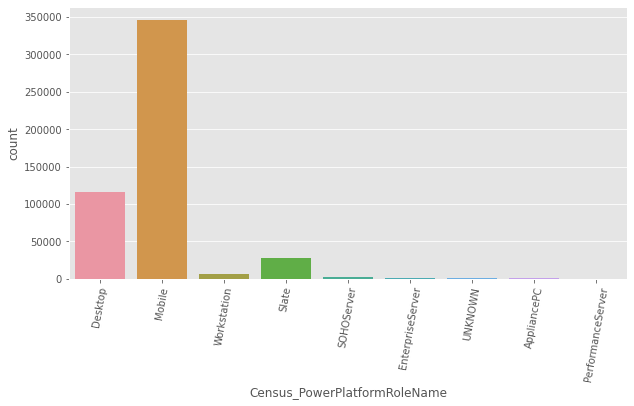

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_PowerPlatformRoleName'])
plt.xticks(rotation=80)

In [ ]:
df_mmp['Census_PowerPlatformRoleName'] = set_Other(df_mmp, 'Census_PowerPlatformRoleName', get_num_values(df_mmp, 'Census_PowerPlatformRoleName'))

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

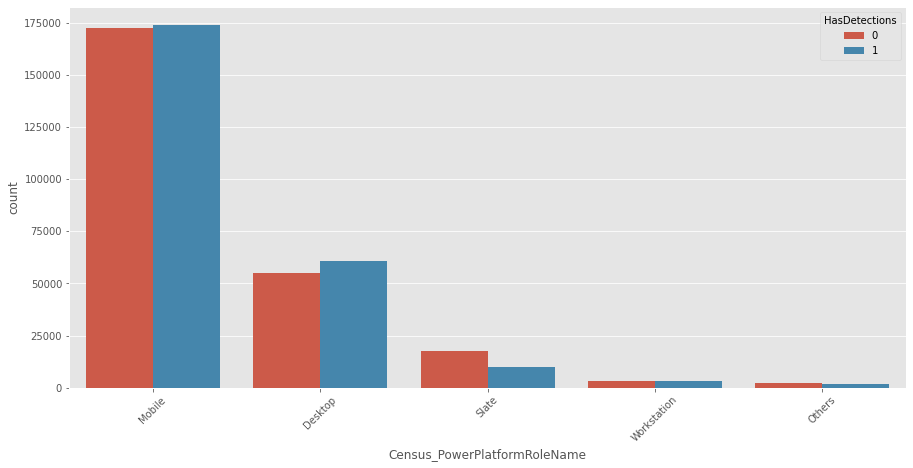

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_PowerPlatformRoleName', hue = TARGET)
plt.xticks(rotation=45)

In [ ]:
df_mmp['Census_PowerPlatformRoleName'].isna().sum()

0

###Census_OSArchitecture

In [ ]:
df_mmp['Census_OSArchitecture'].value_counts()

amd64    454435
x86       45551
arm64        14
Name: Census_OSArchitecture, dtype: int64

In [ ]:
df_mmp['Census_OSArchitecture'].value_counts()

amd64    454435
x86       45551
arm64        14
Name: Census_OSArchitecture, dtype: int64

In [ ]:
pd.crosstab(df_mmp['Census_OSArchitecture'], df_mmp['Processor'])

Processor,arm64,x64,x86
Census_OSArchitecture,,,
amd64,0,453967,468
arm64,14,0,0
x86,0,456,45095


###Census_OSBranch

In [ ]:
df_mmp['Census_OSBranch'].value_counts()

rs4_release                  226001
rs3_release                   69216
rs3_release_svc_escrow        67027
rs2_release                   44264
rs1_release                   43705
th2_release                   18298
th2_release_sec               14895
th1_st1                       10822
th1                            4284
rs5_release                     839
rs3_release_svc_escrow_im       329
rs_prerelease                   184
rs_prerelease_flt               132
rs5_release_sigma                 3
winblue_ltsb_escrow               1
Name: Census_OSBranch, dtype: int64

In [ ]:
df_mmp['Census_OSBranch'].replace('rs3_release_svc_escrow_im ', 'rs3_release', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].replace('rs3_release_svc_escrow', 'rs3_release', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].replace('th1_st1', 'th1 ', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].replace('th2_release_sec ', 'th2_release', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].replace('rs_prerelease_flt', 'rs_prerelease', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].replace('rs5_release_sigma', 'rs5_release', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].replace('rs5_release_sigma', 'rs5_release', inplace=True)

In [ ]:
df_mmp['Census_OSBranch'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

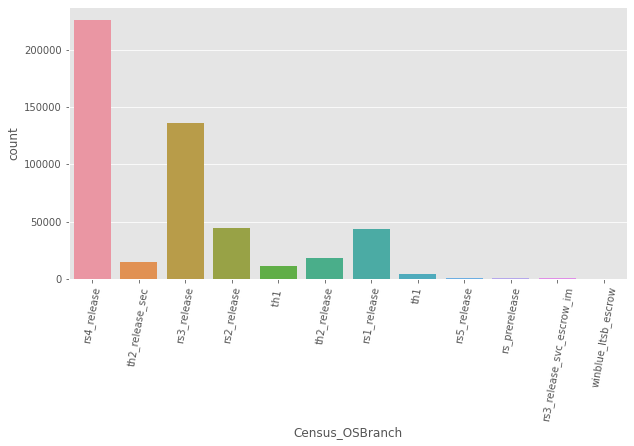

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSBranch'])
plt.xticks(rotation=80)

In [ ]:
df_mmp['Census_OSBranch'] = set_Other(df_mmp, 'Census_OSBranch', get_num_values(df_mmp, 'Census_OSBranch'))

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

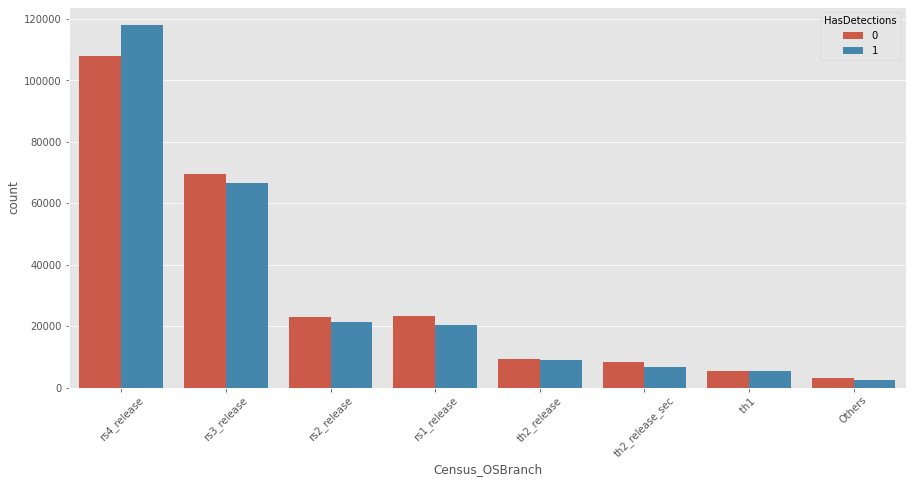

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_OSBranch', hue = TARGET)
plt.xticks(rotation=45)

###Census_OSEdition

In [ ]:
df_mmp['Census_OSEdition'].value_counts()

Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: Census_OSEdition, dtype: int64

In [ ]:
#OBSERVO QUE HAY VARIABLES IGUALES PERO CON UNA LETRA DE MAS, ENTONCES LAS AGRUPARE EN UNA SOLA
#ProfessionalN Y Professional
#EnterpriseS Y Enterprise   
#ProfessionalEducation  Y ProfessionalEducationN 
#Education Y EducationN
#Cloud Y CloudN
#ProfessionalWorkstation Y ProfessionalWorkstationN

In [ ]:
df_mmp['Census_OSEdition'].replace('ProfessionalN', 'Professional', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].replace('EnterpriseN', 'Enterprise', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].replace('EnterpriseS', 'Enterprise', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].replace('ProfessionalEducationN', 'ProfessionalEducation', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].replace('EducationN', 'Education', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].replace('CloudN', 'Cloud', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].replace('ProfessionalWorkstationN', 'ProfessionalWorkstation', inplace= True)

In [ ]:
df_mmp['Census_OSEdition'].value_counts(dropna=False)

Core                       194469
Professional               177432
CoreSingleLanguage         108696
CoreCountrySpecific          9275
Enterprise                   3191
ProfessionalEducation        3112
Education                    2371
ServerStandard                584
Cloud                         337
CoreN                         251
ServerStandardEval            151
ServerDatacenterEval           47
EnterpriseSN                   47
ServerSolution                 34
ProfessionalWorkstation         3
Name: Census_OSEdition, dtype: int64

In [ ]:
df_mmp['Census_OSEdition'] = set_Other(df_mmp, 'Census_OSEdition', get_num_values(df_mmp, 'Census_OSEdition'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

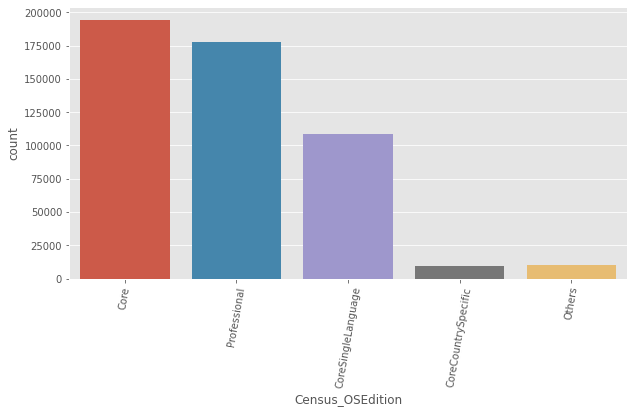

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSEdition'])
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

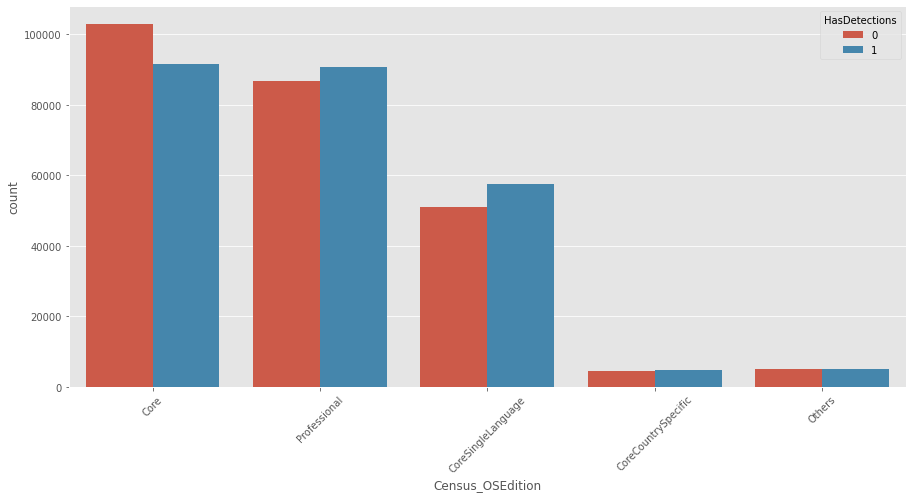

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_OSEdition', hue = TARGET)
plt.xticks(rotation=45)

###Census_OSSkuName

In [ ]:
df_mmp['Census_OSSkuName'].value_counts(dropna=False)

CORE                            194464
PROFESSIONAL                    178947
CORE_SINGLELANGUAGE             108674
CORE_COUNTRYSPECIFIC              9257
EDUCATION                         2313
ENTERPRISE                        2063
PROFESSIONAL_N                    1634
ENTERPRISE_S                      1107
STANDARD_SERVER                    584
CLOUD                              332
CORE_N                             251
STANDARD_EVALUATION_SERVER         151
EDUCATION_N                         61
ENTERPRISE_S_N                      48
DATACENTER_EVALUATION_SERVER        47
SB_SOLUTION_SERVER                  34
ENTERPRISE_N                        28
PRO_WORKSTATION                      2
CLOUDN                               1
PRO_WORKSTATION_N                    1
UNLICENSED                           1
Name: Census_OSSkuName, dtype: int64

In [ ]:
#AQUI SE DA IGUAL QUE EN EL CASO ANTERIOR, VOY A AGRUPAR LAS VARIABLES QUE SON IGUALES Y HARE UN OTHERS CON LAS DEMAS
#EDUCATION Y EDUCATION_N
#ENTERPRISE, ENTERPRISE_N Y ENTERPRISE_S, ENTERPRISE_S_N  
#PROFESSIONAL_N Y PROFESSIONAL 
#CORE_N Y CORE 
#  CLOUD Y CLOUDN
#PRO_WORKSTATION Y PRO_WORKSTATION_N 

In [ ]:
df_mmp['Census_OSSkuName'].replace('PROFESSIONAL_N', 'PROFESSIONAL', inplace= True)

In [ ]:
df_mmp['Census_OSSkuName'].replace('CloudN', 'Cloud', inplace= True)

In [ ]:
df_mmp['Census_OSSkuName'] = set_Other(df_mmp, 'Census_OSSkuName', get_num_values(df_mmp, 'Census_OSSkuName'))

In [ ]:
df_mmp['Census_OSSkuName'].isnull().sum()

0

In [ ]:
df_mmp['Census_OSSkuName'].value_counts()

CORE                    194464
PROFESSIONAL            180581
CORE_SINGLELANGUAGE     108674
CORE_COUNTRYSPECIFIC      9257
Others                    7024
Name: Census_OSSkuName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

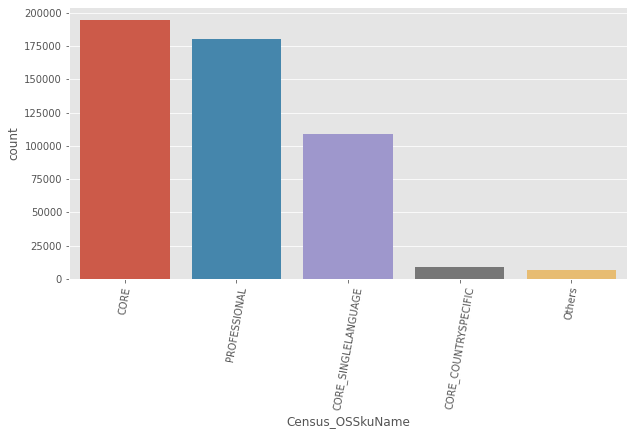

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSSkuName'])
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

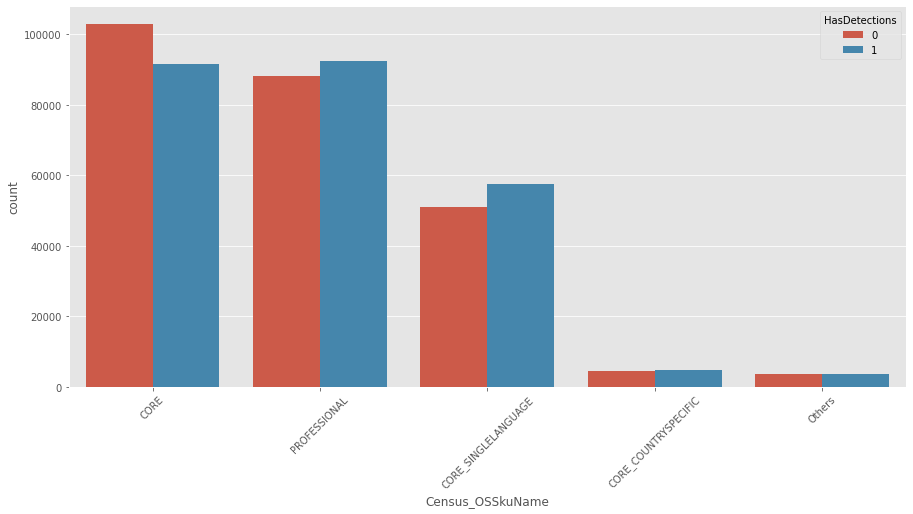

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_OSSkuName', hue = TARGET)
plt.xticks(rotation=45)

###Census_OSInstallTypeName

In [ ]:
df_mmp['Census_OSInstallTypeName'].value_counts()

UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: Census_OSInstallTypeName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

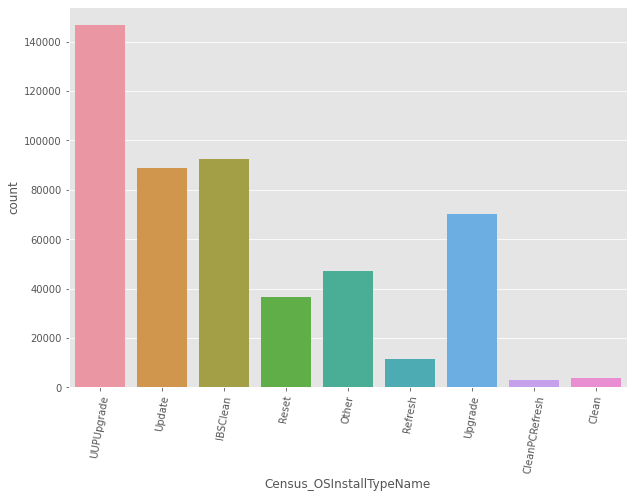

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df_mmp['Census_OSInstallTypeName'])
plt.xticks(rotation=80)

In [ ]:
#ESTA VARIABLE LA DEJARE COMO ESTA

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

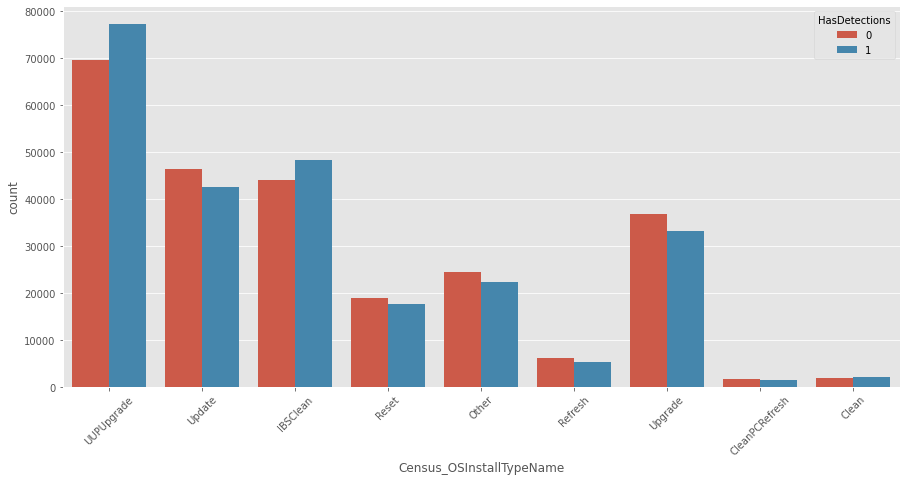

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_OSInstallTypeName', hue = TARGET)
plt.xticks(rotation=45)

###Census_GenuineStateName

In [ ]:
df_mmp['Census_GenuineStateName'].value_counts(dropna=False)

IS_GENUINE         441402
INVALID_LICENSE     44990
OFFLINE             12834
UNKNOWN               774
Name: Census_GenuineStateName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

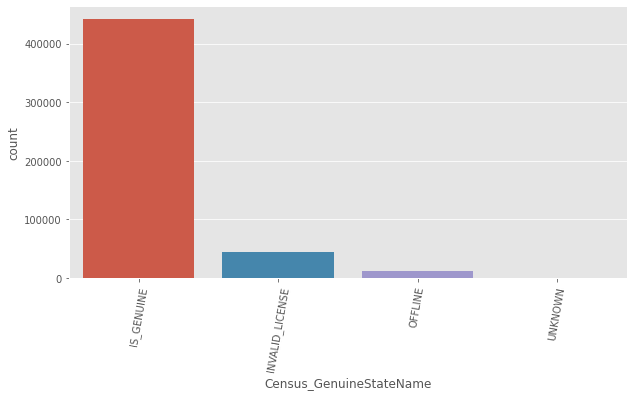

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_GenuineStateName'])
plt.xticks(rotation=80)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

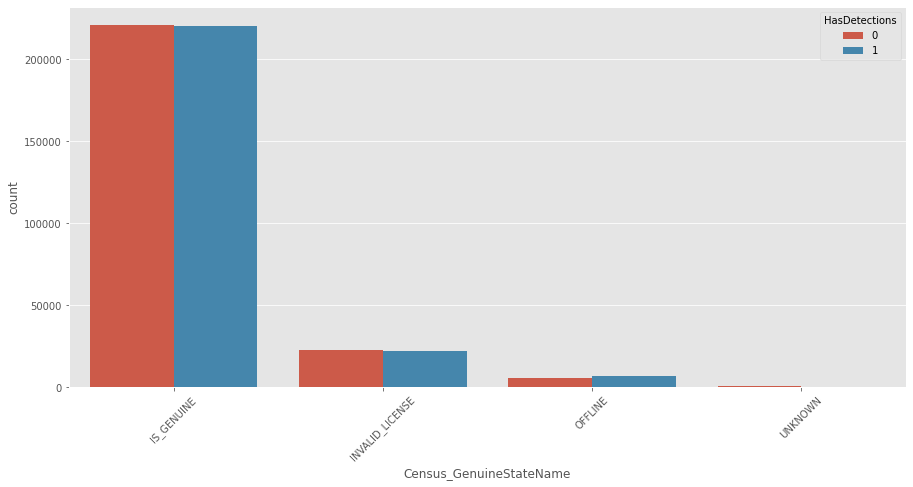

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_GenuineStateName', hue = TARGET)
plt.xticks(rotation=45)

###Census_OSWUAutoUpdateOptionsName

In [ ]:
df_mmp['Census_OSWUAutoUpdateOptionsName'].value_counts(dropna=False)

FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: Census_OSWUAutoUpdateOptionsName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

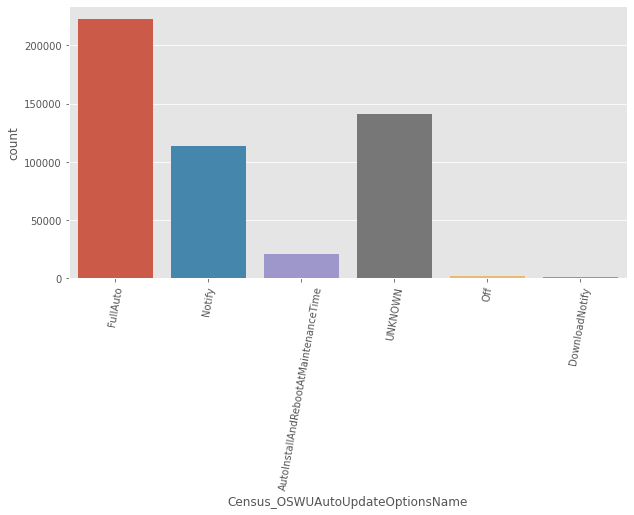

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSWUAutoUpdateOptionsName'])
plt.xticks(rotation=80)

In [ ]:
#A ESTA VARIABLE IGUAL QUE EN EL CASO ANTERIOR LA DEJARE COMO ESTA

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

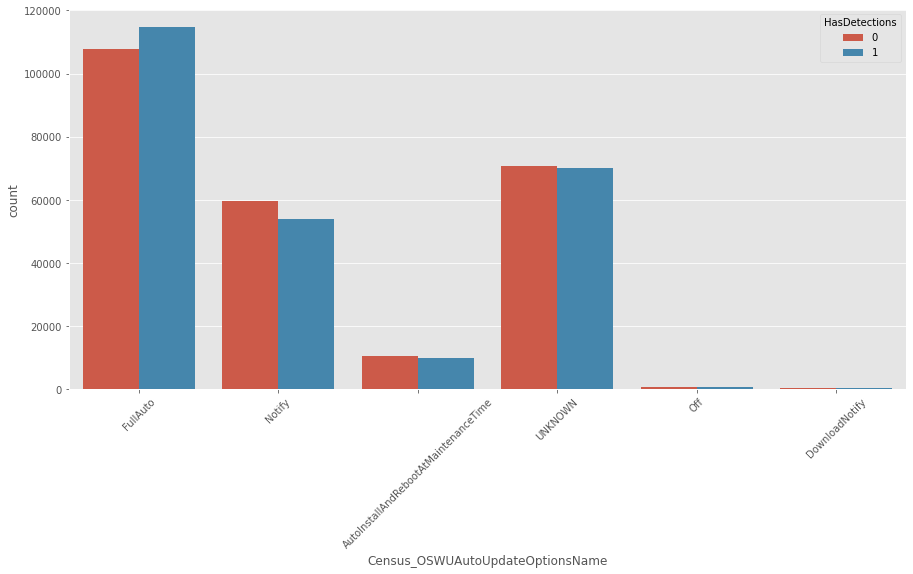

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_OSWUAutoUpdateOptionsName', hue = TARGET)
plt.xticks(rotation=45)

###Census_ActivationChannel

In [ ]:
df_mmp['Census_ActivationChannel'].value_counts()

Retail            264932
OEM:DM            191350
Volume:GVLK        25109
OEM:NONSLP         17943
Volume:MAK           468
Retail:TB:Eval       198
Name: Census_ActivationChannel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

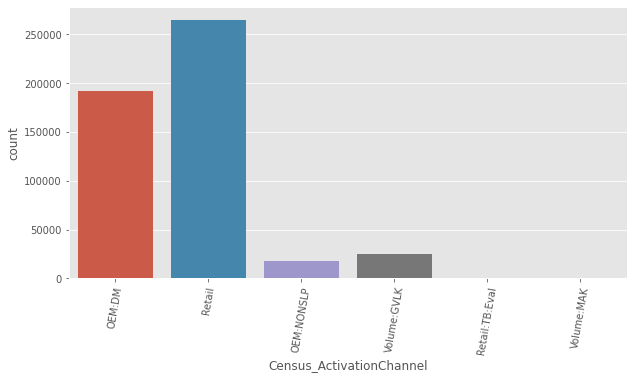

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ActivationChannel'])
plt.xticks(rotation=80)

In [ ]:
df_mmp['Census_ActivationChannel'] = set_Other(df_mmp, 'Census_ActivationChannel', get_num_values(df_mmp, 'Census_ActivationChannel'))

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

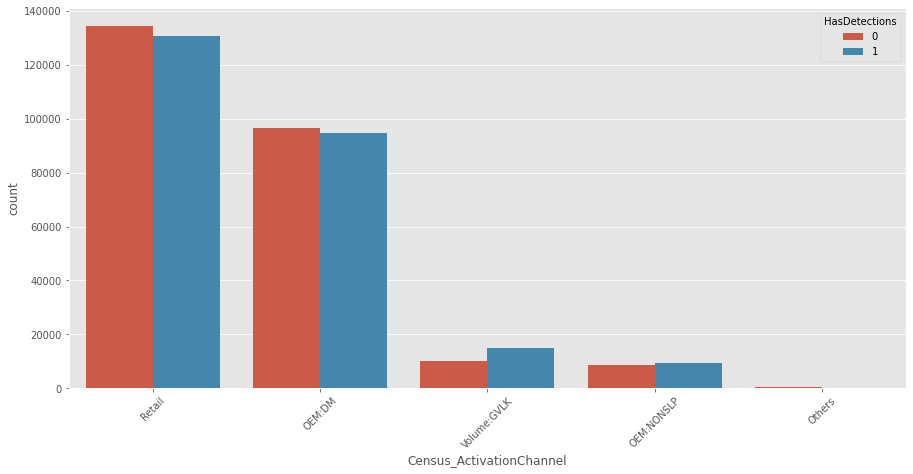

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_ActivationChannel', hue = TARGET)
plt.xticks(rotation=45)

###Census_FlightRing

In [ ]:
df_mmp['Census_FlightRing'].value_counts(dropna=False)

Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: Census_FlightRing, dtype: int64

In [ ]:
df_mmp['Census_FlightRing'] = set_Other(df_mmp, 'Census_FlightRing', get_num_values(df_mmp, 'Census_FlightRing'))

In [ ]:
df_mmp['Census_FlightRing'].replace('NOT_SET', 'Others',inplace=True)

In [ ]:
df_mmp['Census_FlightRing'].replace('Unknown', 'Others',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

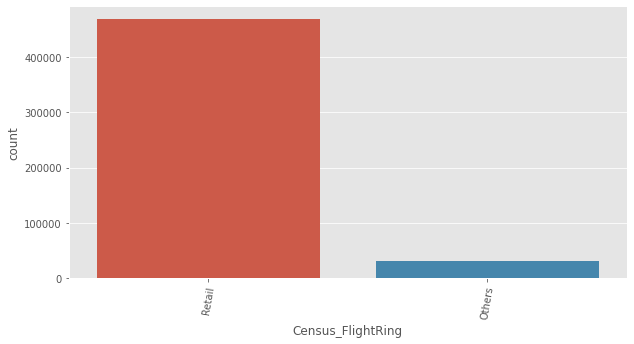

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_FlightRing'])
plt.xticks(rotation=80)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

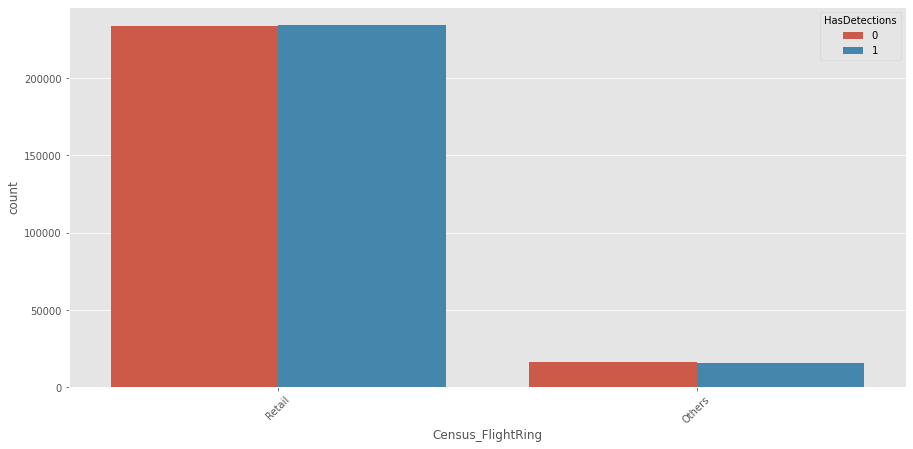

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_FlightRing', hue = TARGET)
plt.xticks(rotation=45)

###OsBuild

In [ ]:
df_mmp['OsBuild'].value_counts(dropna=False)

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
17692       155
17738       134
17744       129
17758        86
17746        62
17713        60
17754        56
17751        53
17741        51
17755        45
17735        37
17686        36
17733        34
17763        33
7600         33
17760        31
17682        20
17677        17
18234        16
17672        15
18242        12
18237        12
17661         9
17666         8
17723         4
17634         4
17639         3
17730         3
17618         3
17747         3
17655         2
17650         2
17753         1
17604         1
18214         1
17711         1
17704         1
18219         1
17623         1
17749         1
Name: OsBuild, dtype: int64

In [ ]:
#HAGO UN SET OTHERS
df_mmp['OsBuild'] = set_Other(df_mmp, 'OsBuild', get_num_values(df_mmp, 'OsBuild'), -1)

In [ ]:
df_mmp['OsBuild'].value_counts()

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
-1         1176
Name: OsBuild, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

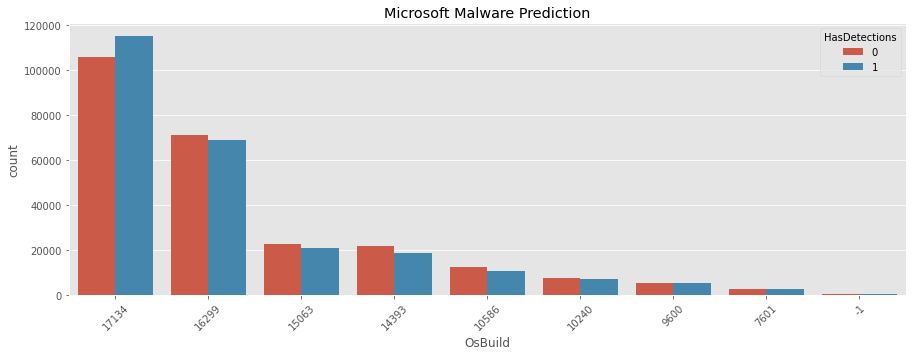

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'OsBuild', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###OsSuite

In [ ]:
df_mmp['OsSuite'].value_counts(dropna=False)

768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: OsSuite, dtype: int64

In [ ]:
#HAGO SET OTHERS
df_mmp['OsSuite'] = set_Other(df_mmp, 'OsSuite', get_num_values(df_mmp, 'OsSuite'), -1)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

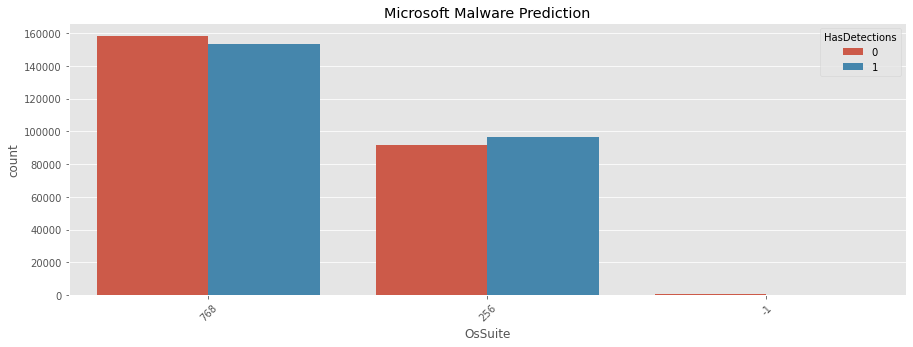

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'OsSuite', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#AQUI VEMOS QUE AQUELLOS QUE TENGAN OSSUITE 256 TENDRAN UN POCO MAS DE DETECCIONES QUE AQUELLOS CON EL 768

###IeVerIdentifier

In [ ]:
df_mmp['IeVerIdentifier'].value_counts(dropna=False)

137.0    219142
117.0     98667
108.0     26353
111.0     26143
98.0      19731
          ...  
79.0          1
15.0          1
54.0          1
192.0         1
281.0         1
Name: IeVerIdentifier, Length: 180, dtype: int64

In [ ]:
df_mmp['IeVerIdentifier'].value_counts().head(13)

137.0    219142
117.0     98667
108.0     26353
111.0     26143
98.0      19731
135.0     12314
74.0      11395
53.0      11352
94.0       9715
105.0      9695
333.0      8751
107.0      7080
103.0      6364
Name: IeVerIdentifier, dtype: int64

In [ ]:
df_mmp['IeVerIdentifier'] = set_Other(df_mmp, 'IeVerIdentifier', get_num_values(df_mmp, 'IeVerIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

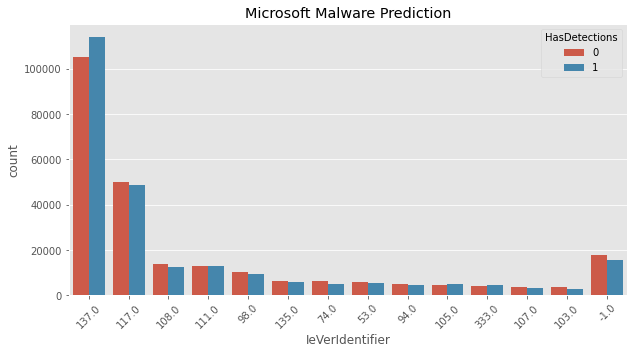

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'IeVerIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###AVProductStatesIdentifier

In [ ]:
df_mmp[['AVProductStatesIdentifier']].value_counts()

AVProductStatesIdentifier
53447.0                      326463
7945.0                        26642
47238.0                       18436
62773.0                       14931
46413.0                        6343
                              ...  
30157.0                           1
30162.0                           1
30167.0                           1
30171.0                           1
70492.0                           1
Length: 5516, dtype: int64

In [ ]:
df_mmp[['AVProductStatesIdentifier']].value_counts().head(8)

AVProductStatesIdentifier
53447.0                      326463
7945.0                        26642
47238.0                       18436
62773.0                       14931
46413.0                        6343
23657.0                        5717
49480.0                        5684
41571.0                        5472
dtype: int64

In [ ]:
#ESTA VARIABLE TIENE MUCHAS ETIQUETAS CON UN SOLO VALOR, PUEDO HACERLE UN SET OTHERS Y QUEDARME CON LAS PRIMERAS 8 ETIQUETAS 
df_mmp['AVProductStatesIdentifier'] = set_Other(df_mmp, 'AVProductStatesIdentifier', get_num_values(df_mmp, 'AVProductStatesIdentifier'), -1)

In [ ]:
df_mmp[['AVProductStatesIdentifier']].isnull().sum()

AVProductStatesIdentifier    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

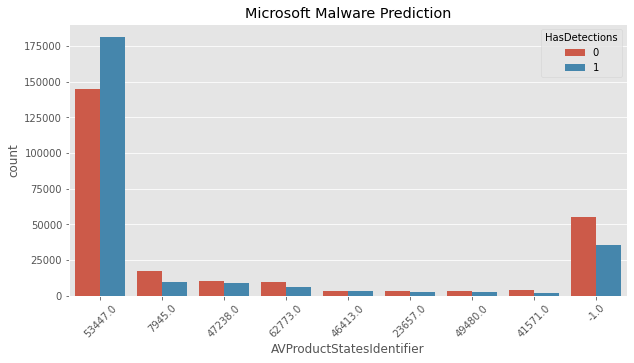

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'AVProductStatesIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#LOS QUE TIENEN UN ID DE 53447 TIENEN MAS DETECCIONES QUE CUALQUIER OTRA ETIQUETA 

###Census_OEMNameIdentifier


In [ ]:
df_mmp['Census_OEMNameIdentifier'].value_counts(dropna=False)

2668.0    72011
2102.0    57924
1443.0    53210
2206.0    51888
585.0     50304
          ...  
3997.0        1
3546.0        1
4037.0        1
2429.0        1
1900.0        1
Name: Census_OEMNameIdentifier, Length: 1590, dtype: int64

In [ ]:
df_mmp['Census_OEMNameIdentifier'].value_counts().head()

2668.0    72011
2102.0    57924
1443.0    53210
2206.0    51888
585.0     50304
Name: Census_OEMNameIdentifier, dtype: int64

In [ ]:
df_mmp['Census_OEMNameIdentifier'] = set_Other(df_mmp, 'Census_OEMNameIdentifier', get_num_values(df_mmp, 'Census_OEMNameIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

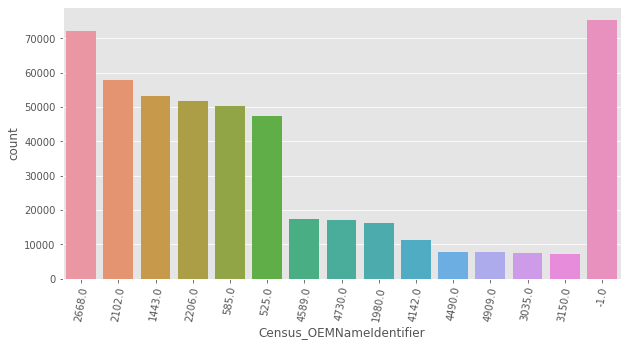

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OEMNameIdentifier'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

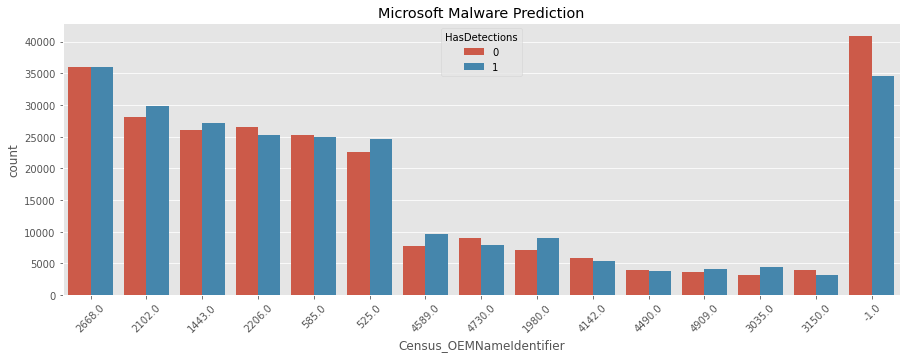

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_OEMNameIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_OEMModelIdentifier

In [ ]:
df_mmp['Census_OEMModelIdentifier'].value_counts(dropna=False)

313586.0    17092
242491.0    14726
317701.0     7676
317708.0     6541
NaN          5764
            ...  
1917.0          1
318232.0        1
342796.0        1
8067.0          1
35038.0         1
Name: Census_OEMModelIdentifier, Length: 40698, dtype: int64

In [ ]:
df_mmp['Census_OEMModelIdentifier'].value_counts().head()

313586.0    17092
242491.0    14726
317701.0     7676
317708.0     6541
228975.0     4389
Name: Census_OEMModelIdentifier, dtype: int64

In [ ]:
df_mmp['Census_OEMModelIdentifier'] = set_Other(df_mmp, 'Census_OEMModelIdentifier', get_num_values(df_mmp, 'Census_OEMModelIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

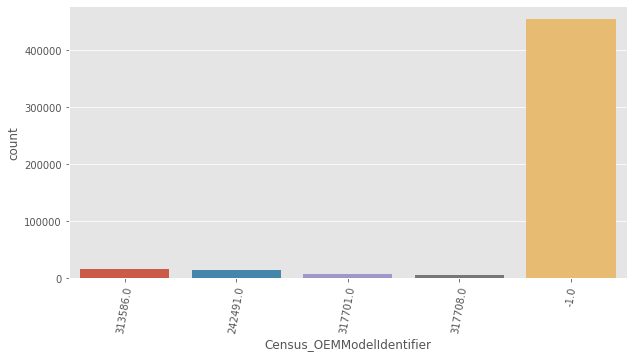

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OEMModelIdentifier'])
plt.xticks(rotation=80)

###Census_ProcessorModelIdentifier

In [ ]:
df_mmp['Census_ProcessorModelIdentifier'].value_counts(dropna=False)

2697.0    16180
1998.0    14874
2660.0    10736
2373.0     9885
1992.0     9502
          ...  
4091.0        1
1328.0        1
1852.0        1
3130.0        1
4027.0        1
Name: Census_ProcessorModelIdentifier, Length: 2244, dtype: int64

In [ ]:
df_mmp['Census_ProcessorModelIdentifier'] = set_Other(df_mmp, 'Census_ProcessorModelIdentifier', get_num_values(df_mmp, 'Census_ProcessorModelIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

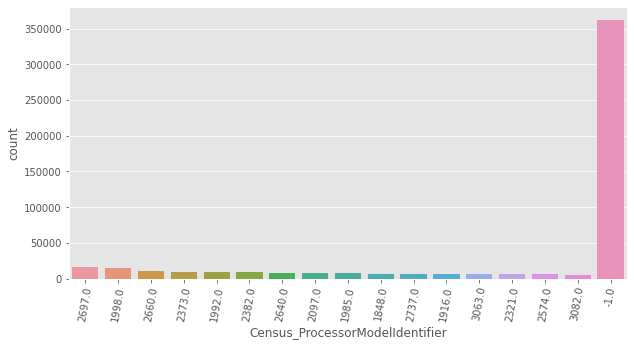

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ProcessorModelIdentifier'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

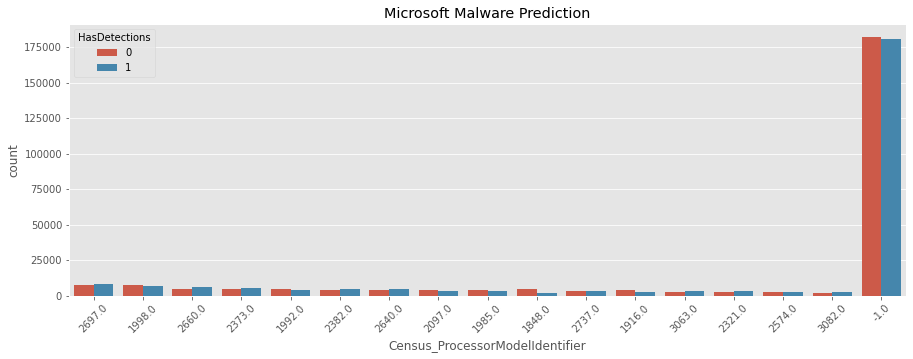

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_ProcessorModelIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_OSInstallLanguageIdentifier

In [ ]:
df_mmp['Census_OSInstallLanguageIdentifier'].value_counts(dropna=False)

8.0     178405
9.0      58013
7.0      28766
29.0     27669
14.0     24191
37.0     22635
10.0     20268
26.0     18520
5.0      14085
35.0     11497
39.0     11221
18.0     10600
20.0      9512
24.0      8127
25.0      7502
27.0      5956
19.0      4775
17.0      4695
1.0       4516
3.0       4067
NaN       3332
6.0       2881
33.0      2807
15.0      2311
4.0       1996
30.0      1793
23.0      1652
31.0      1213
12.0      1119
2.0       1096
36.0       846
16.0       837
28.0       713
34.0       584
13.0       581
21.0       413
32.0       246
11.0       197
38.0       185
22.0       178
Name: Census_OSInstallLanguageIdentifier, dtype: int64

In [ ]:
df_mmp['Census_OSInstallLanguageIdentifier'] = set_Other(df_mmp, 'Census_OSInstallLanguageIdentifier', get_num_values(df_mmp, 'Census_OSInstallLanguageIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

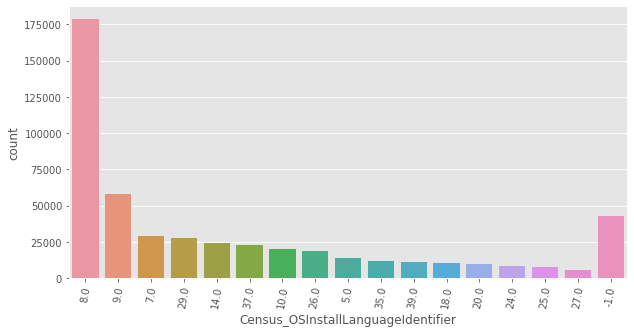

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSInstallLanguageIdentifier'])
plt.xticks(rotation=80)


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

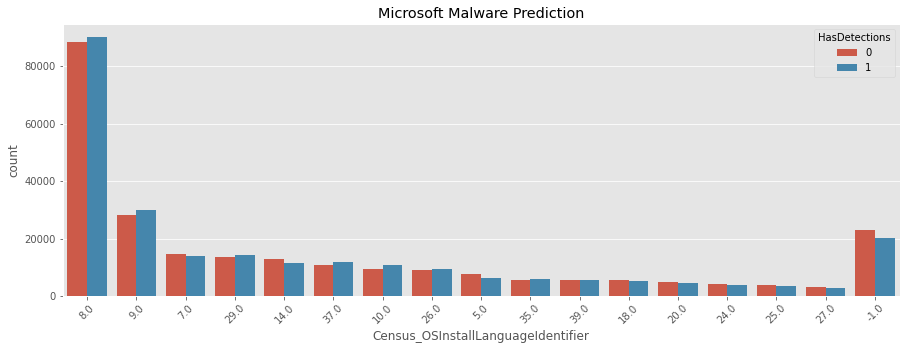

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_OSInstallLanguageIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_OSUILocaleIdentifier

In [ ]:
df_mmp['Census_OSUILocaleIdentifier'].value_counts()

31     177983
34      58307
30      28798
125     28001
49      24423
        ...  
89          1
22          1
6           1
71          1
141         1
Name: Census_OSUILocaleIdentifier, Length: 92, dtype: int64

In [ ]:
df_mmp['Census_OSUILocaleIdentifier'] = set_Other(df_mmp, 'Census_OSUILocaleIdentifier', get_num_values(df_mmp, 'Census_OSUILocaleIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

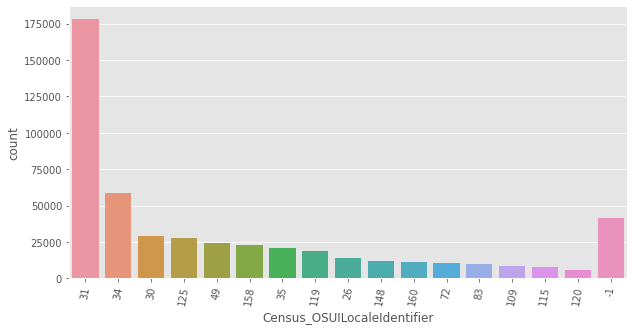

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSUILocaleIdentifier'])
plt.xticks(rotation=80)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

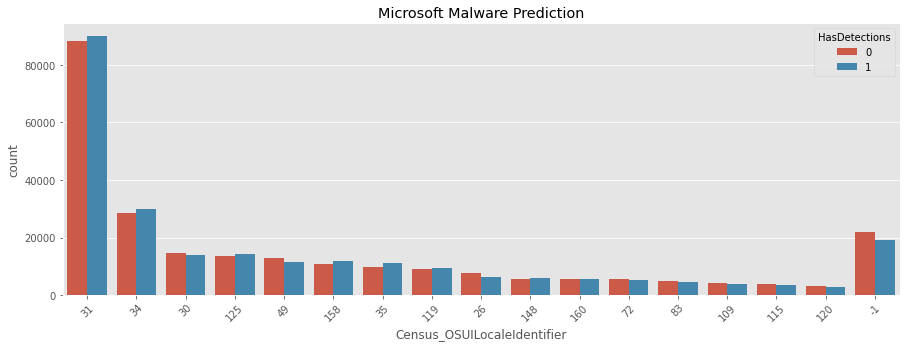

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_OSUILocaleIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_FirmwareManufacturerIdentifier

In [ ]:
df_mmp['Census_FirmwareManufacturerIdentifier'].value_counts()

142.0    151374
628.0     68781
554.0     65673
355.0     52758
556.0     44919
          ...  
33.0          1
697.0         1
13.0          1
334.0         1
585.0         1
Name: Census_FirmwareManufacturerIdentifier, Length: 303, dtype: int64

In [ ]:
df_mmp['Census_FirmwareManufacturerIdentifier'] = set_Other(df_mmp, 'Census_FirmwareManufacturerIdentifier', get_num_values(df_mmp, 'Census_FirmwareManufacturerIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

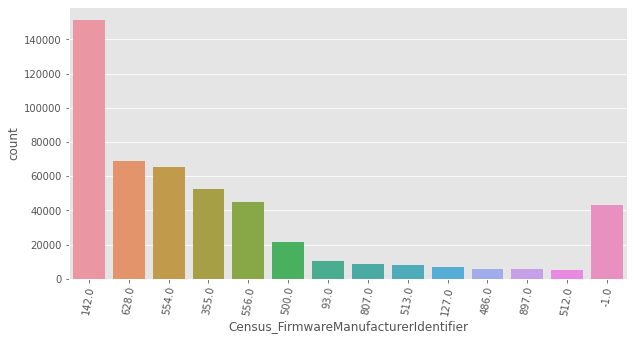

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_FirmwareManufacturerIdentifier'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

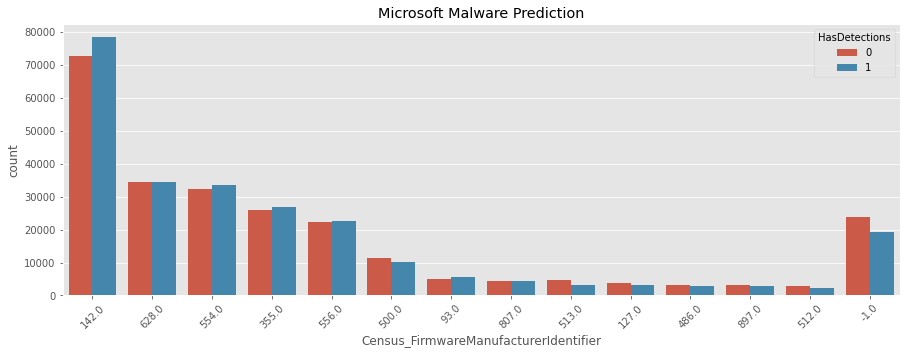

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_FirmwareManufacturerIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_FirmwareVersionIdentifier

In [ ]:
df_mmp['Census_FirmwareVersionIdentifier'].value_counts(dropna=False)

NaN        9061
33105.0    5036
33111.0    3356
33054.0    3124
33108.0    3071
           ... 
41482.0       1
41752.0       1
20762.0       1
15577.0       1
54497.0       1
Name: Census_FirmwareVersionIdentifier, Length: 23570, dtype: int64

In [ ]:
df_mmp['Census_FirmwareVersionIdentifier'] = set_Other(df_mmp, 'Census_FirmwareVersionIdentifier', get_num_values(df_mmp, 'Census_FirmwareVersionIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

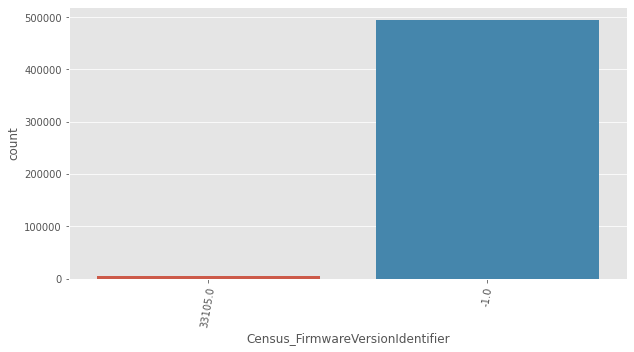

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_FirmwareVersionIdentifier'])
plt.xticks(rotation=80)

###Wdft_RegionIdentifier

In [ ]:
df_mmp['Wdft_RegionIdentifier'].value_counts(dropna=False)

10.0    100392
11.0     75612
3.0      73069
1.0      68692
15.0     57346
7.0      33362
NaN      16950
8.0      15761
13.0     12681
5.0      11466
12.0      9115
6.0       8750
4.0       7586
9.0       4521
2.0       4470
14.0       227
Name: Wdft_RegionIdentifier, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

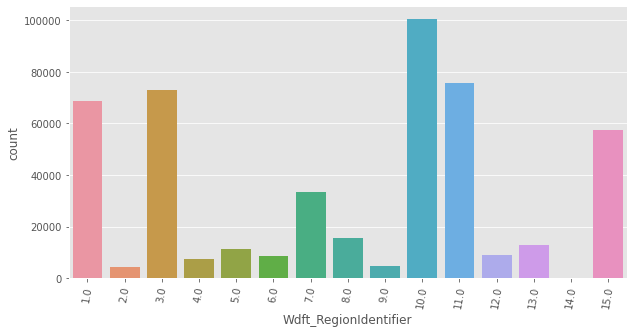

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Wdft_RegionIdentifier'])
plt.xticks(rotation=80)

In [ ]:
#A LOS NULOS LES ASIGNARE UN VALOR EXTREMO
df_mmp['Wdft_RegionIdentifier'] = df_mmp['Wdft_RegionIdentifier'].fillna(-1)

In [ ]:
pd.crosstab(df_mmp['Wdft_RegionIdentifier'], df_mmp['CountryIdentifier'])

CountryIdentifier,1,2,3,4,5,6,7,8,9,10,...,213,214,215,216,217,218,219,220,221,222
Wdft_RegionIdentifier,,,,,,,,,,,,,,,,,,,,,
-1.0,1,89,2,3,0,18,33,10,320,0,...,1,614,1,1,0,4,1,86,4,10
1.0,0,10,1,0,0,0,0,0,0,0,...,0,9916,28,16,0,0,0,3,0,0
2.0,0,0,0,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,1,1,0
3.0,0,6,2,0,0,532,776,4,1,0,...,0,4,0,0,9,3,0,1,0,0
4.0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5.0,1,0,0,0,0,0,2,0,1,0,...,0,1,0,0,0,0,5,1,0,0
6.0,0,1,0,0,0,3,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
7.0,0,4,0,0,0,0,0,0,0,0,...,0,11,0,0,0,0,0,2,1,2
8.0,0,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


###CountryIdentifier

In [ ]:
df_mmp[['CountryIdentifier']].value_counts()

CountryIdentifier
43                   22339
29                   19273
141                  18420
93                   16205
171                  15743
                     ...  
212                     13
37                      12
165                     11
217                     10
193                      9
Length: 222, dtype: int64

In [ ]:
df_mmp['CountryIdentifier'] = set_Other(df_mmp, 'CountryIdentifier', get_num_values(df_mmp, 'CountryIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

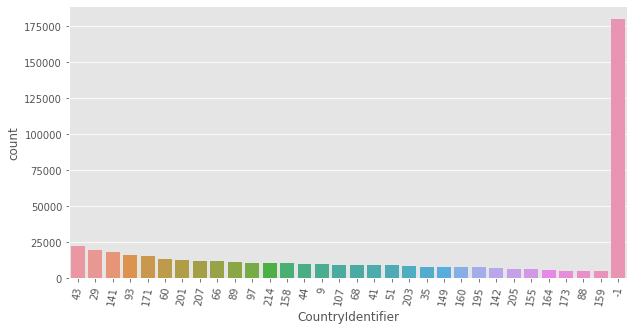

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['CountryIdentifier'])
plt.xticks(rotation=80)

###CityIdentifier

In [ ]:
df_mmp['CityIdentifier'].value_counts(dropna=False)

NaN         18240
130775.0     5271
16668.0      4747
82373.0      4649
10222.0      4011
            ...  
151632.0        1
41727.0         1
83230.0         1
131294.0        1
148194.0        1
Name: CityIdentifier, Length: 37158, dtype: int64

In [ ]:
#LA ELIMINO PORQUE TENGO MUCHAS ETIQUETAS CON POCOS DATOS. Dejare solo por paises

In [ ]:
df_mmp.drop('CityIdentifier', axis =1 , inplace = True)

###GeoNameIdentifier

In [ ]:
df_mmp['GeoNameIdentifier'].value_counts()

277.0    86080
211.0    23593
53.0     22977
89.0     20174
240.0    19489
         ...  
280.0        1
231.0        1
113.0        1
221.0        1
132.0        1
Name: GeoNameIdentifier, Length: 268, dtype: int64

In [ ]:
len(df_mmp['GeoNameIdentifier'].value_counts())

268

In [ ]:
df_mmp['GeoNameIdentifier'] = set_Other(df_mmp, 'GeoNameIdentifier', get_num_values(df_mmp, 'GeoNameIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

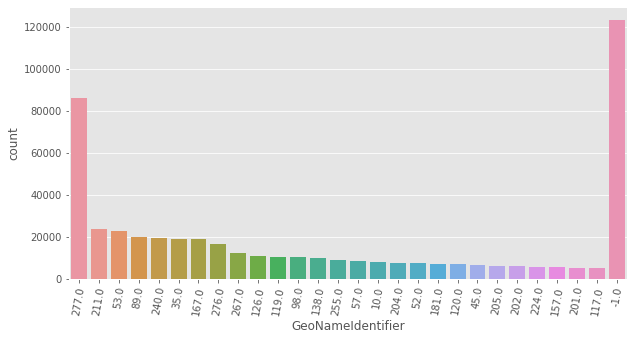

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['GeoNameIdentifier'])
plt.xticks(rotation=80)

###OrganizationIdentifier

In [ ]:
df_mmp['OrganizationIdentifier'].value_counts(dropna=False)

27.0    234885
NaN     154563
18.0     98842
48.0      3658
50.0      2538
37.0      1048
11.0      1037
49.0       747
46.0       641
14.0       255
32.0       230
36.0       207
52.0       174
33.0       171
2.0        153
5.0        110
40.0       100
28.0        98
4.0         79
10.0        69
51.0        53
1.0         39
20.0        38
8.0         37
6.0         25
31.0        23
47.0        22
39.0        21
22.0        21
3.0         20
21.0        19
16.0        16
19.0        10
29.0         8
42.0         8
7.0          7
44.0         6
26.0         6
43.0         4
45.0         4
41.0         2
35.0         2
23.0         2
25.0         1
17.0         1
Name: OrganizationIdentifier, dtype: int64

In [ ]:
df_mmp['OrganizationIdentifier'] = set_Other(df_mmp, 'OrganizationIdentifier', get_num_values(df_mmp, 'OrganizationIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

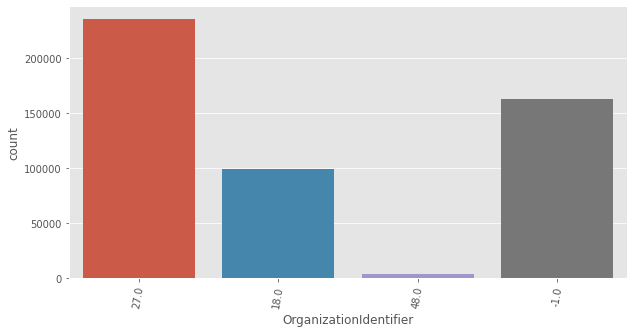

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['OrganizationIdentifier'])
plt.xticks(rotation=80)

###Census_InternalPrimaryDisplayResolutionHorizontal

In [ ]:
df_mmp['Census_InternalPrimaryDisplayResolutionHorizontal'].value_counts()

1366.0     251999
1920.0     125095
1280.0      29690
1600.0      28231
1024.0      19327
            ...  
1272.0          1
1689.0          1
1016.0          1
1772.0          1
10320.0         1
Name: Census_InternalPrimaryDisplayResolutionHorizontal, Length: 474, dtype: int64

In [ ]:
df_mmp['Census_InternalPrimaryDisplayResolutionHorizontal'] = set_Other(df_mmp, 'Census_InternalPrimaryDisplayResolutionHorizontal', get_num_values(df_mmp, 'Census_InternalPrimaryDisplayResolutionHorizontal'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

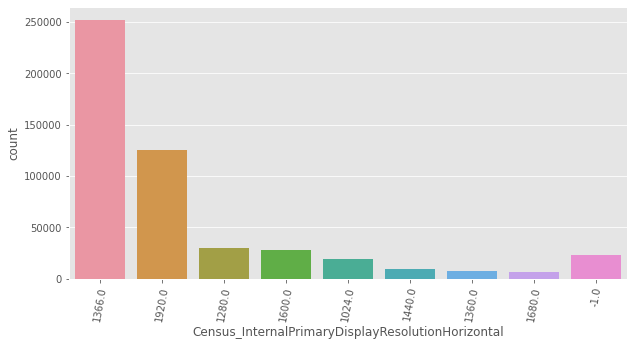

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_InternalPrimaryDisplayResolutionHorizontal'])
plt.xticks(rotation=80)

###LocaleEnglishNameIdentifier


In [ ]:
df_mmp['LocaleEnglishNameIdentifier'].value_counts(dropna=False)  

75     117818
182     25187
42      23007
74      22894
88      20988
        ...  
152         1
155         1
165         1
190         1
127         1
Name: LocaleEnglishNameIdentifier, Length: 233, dtype: int64

In [ ]:
len(df_mmp['LocaleEnglishNameIdentifier'].value_counts())

233

In [ ]:
df_mmp['LocaleEnglishNameIdentifier'] = set_Other(df_mmp, 'LocaleEnglishNameIdentifier', get_num_values(df_mmp, 'LocaleEnglishNameIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

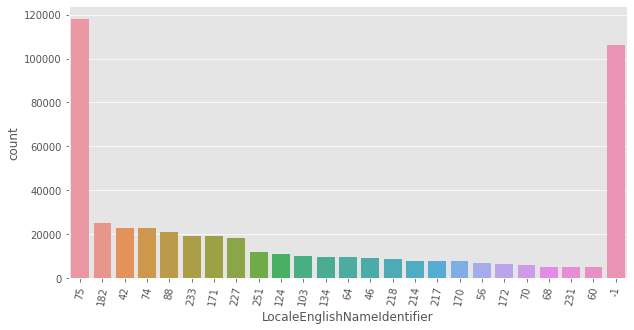

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['LocaleEnglishNameIdentifier'])
plt.xticks(rotation=80)

###Processor

In [ ]:
df_mmp['Processor'].value_counts(dropna=False)

x64      454423
x86       45563
arm64        14
Name: Processor, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

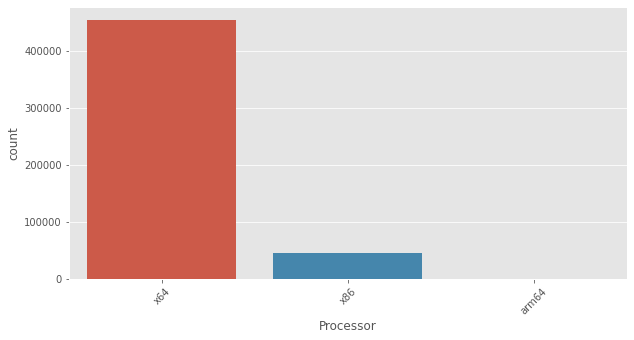

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Processor'])
plt.xticks(rotation=45)

In [ ]:
df_mmp[df_mmp[TARGET]== 0].pivot_table(index = 'Processor', values = TARGET, aggfunc = [len] )

,len
,HasDetections
Processor,
arm64,14
x64,222102
x86,27931


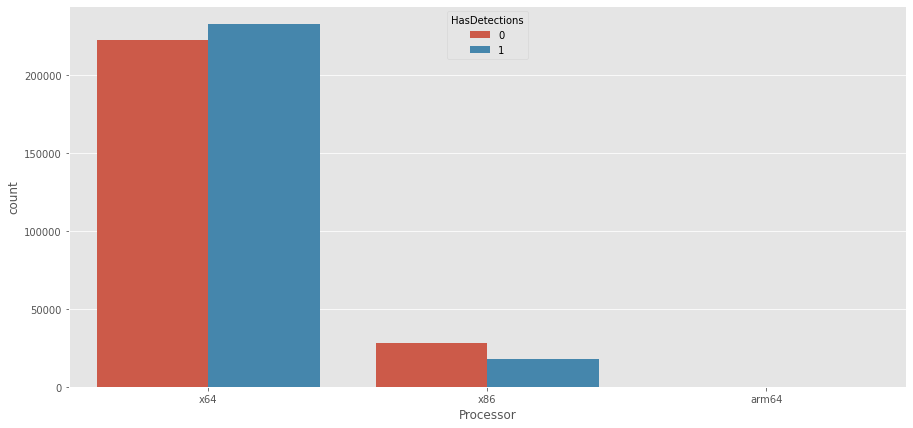

In [ ]:
#a mejor procesador menos detecciones
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Processor', hue = TARGET)

###SmartScreen

In [ ]:
df_mmp['SmartScreen'].value_counts(dropna=False)

RequireAdmin    241594
NaN             178596
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: SmartScreen, dtype: int64

In [ ]:
df_mmp['SmartScreen'].isnull().sum()

178596

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

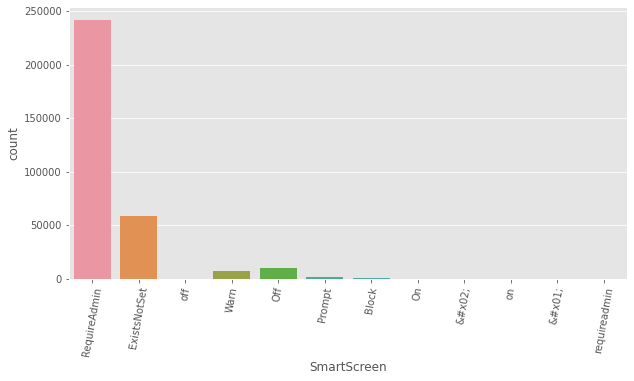

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['SmartScreen'])
plt.xticks(rotation=80)

In [ ]:
#OBSERVO QUE HAY VARIABLES QUE SE DISTINGUEN SOLO POR MAYUSCULAS Y MINUSCULAS PERO SON LAS MISMAS, ENTONCES LAS AGRUPO

In [ ]:
df_mmp['SmartScreen'].replace('off', 'Off', inplace = True)

In [ ]:
df_mmp['SmartScreen'].replace('on', 'On', inplace = True)

In [ ]:
df_mmp['SmartScreen'].replace('requireadmin', 'RequireAdmin', inplace = True)

In [ ]:
df_mmp['SmartScreen'].value_counts()

RequireAdmin    241595
ExistsNotSet     58497
Off              10463
Warn              7530
Prompt            1950
Block             1274
On                  61
&#x02;              20
&#x01;              14
Name: SmartScreen, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

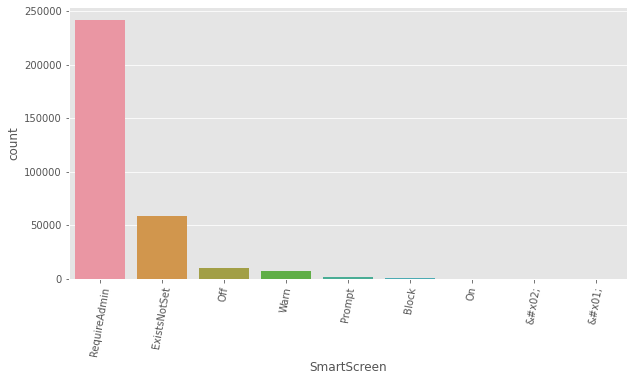

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['SmartScreen'])
plt.xticks(rotation=80)

In [ ]:
get_num_values(df_mmp, 'SmartScreen')

4

In [ ]:
#HACEMOS TAMBIEN UN SET OTHERS DE LOS MINORITARIOS 
df_mmp['SmartScreen'] = set_Other(df_mmp, 'SmartScreen', get_num_values(df_mmp, 'SmartScreen'))

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

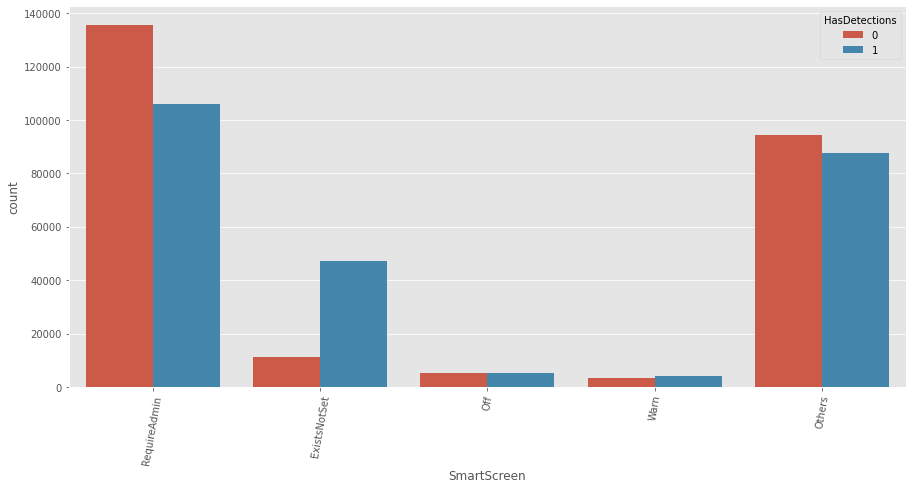

In [ ]:
#EN ESTE CASO LOS NULOS QUEDARAN COMO CATEGORIA OTHERS, OTRA OPCION SERIA PONERLOS EN LA MODA PERO EN MI OPINION SON DEMASIADOS
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'SmartScreen', hue = TARGET)
plt.xticks(rotation=80)

###Census_InternalPrimaryDiagonalDisplaySizeInInches

In [ ]:
df_mmp['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts()

15.5    171319
13.9     52873
14.0     30492
11.6     17592
21.5     15441
         ...  
32.5         1
85.8         1
49.1         1
60.2         1
95.4         1
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, Length: 520, dtype: int64

In [ ]:
df_mmp['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = set_Other(df_mmp, 'Census_InternalPrimaryDiagonalDisplaySizeInInches', get_num_values(df_mmp, 'Census_InternalPrimaryDiagonalDisplaySizeInInches'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

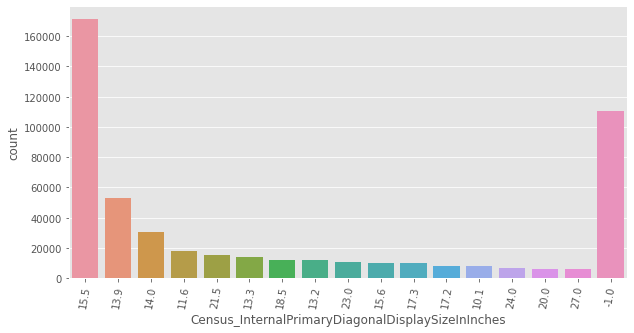

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_InternalPrimaryDiagonalDisplaySizeInInches'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

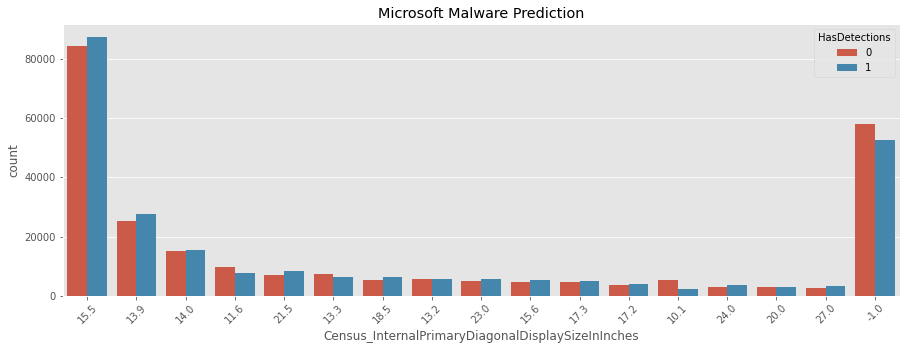

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_InternalPrimaryDiagonalDisplaySizeInInches', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_InternalPrimaryDisplayResolutionVertical

In [ ]:
df_mmp['Census_InternalPrimaryDisplayResolutionVertical'].value_counts()

768.0     277762
1080.0    121145
900.0      36912
800.0      14687
1024.0     10603
           ...  
1960.0         1
1295.0         1
2286.0         1
880.0          1
1612.0         1
Name: Census_InternalPrimaryDisplayResolutionVertical, Length: 514, dtype: int64

In [ ]:
df_mmp['Census_InternalPrimaryDisplayResolutionVertical'] = set_Other(df_mmp, 'Census_InternalPrimaryDisplayResolutionVertical', get_num_values(df_mmp, 'Census_InternalPrimaryDisplayResolutionVertical'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

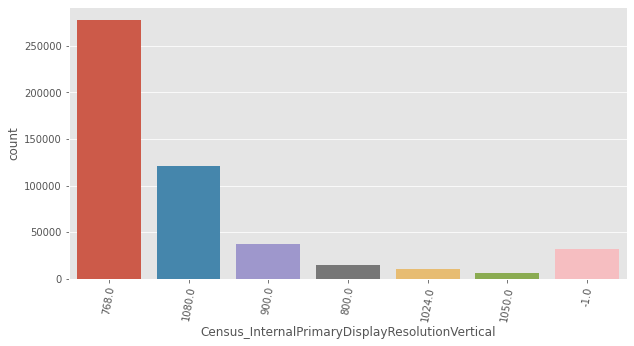

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_InternalPrimaryDisplayResolutionVertical'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

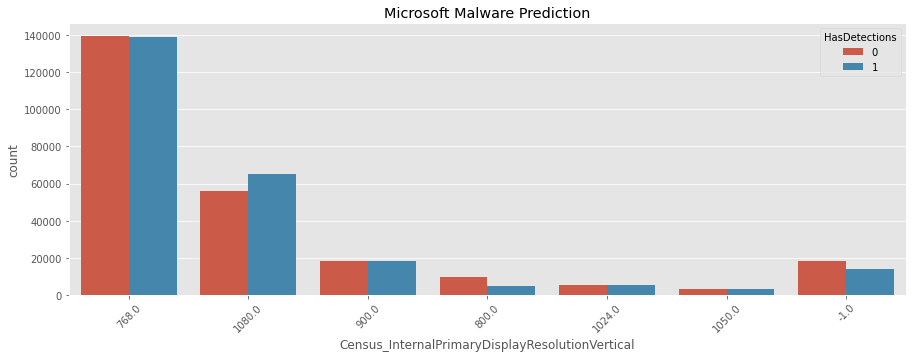

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_InternalPrimaryDisplayResolutionVertical', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_InternalBatteryType 

In [ ]:
df_mmp['Census_InternalBatteryType'].value_counts()

lion    113500
li-i     13855
#        10176
lip       3326
liio      1814
li p       466
li         356
nimh       272
real       162
bq20       143
pbac       130
vbox        89
lgi0        29
unkn        19
lipo        13
lhp0        12
ithi         7
4cel         6
ram          5
batt         3
bad          3
lipp         3
a132         2
virt         2
li-l         1
lgl0         1
icp3         1
3ion         1
Name: Census_InternalBatteryType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

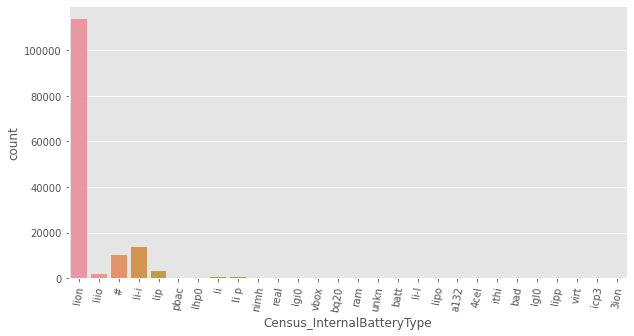

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_InternalBatteryType'])
plt.xticks(rotation=80)

In [ ]:
df_mmp['Census_InternalBatteryType'] = set_Other(df_mmp, 'Census_InternalBatteryType', get_num_values(df_mmp, 'Census_InternalBatteryType'))

Text(0.5, 1.0, 'Microsoft Malware Prediction')

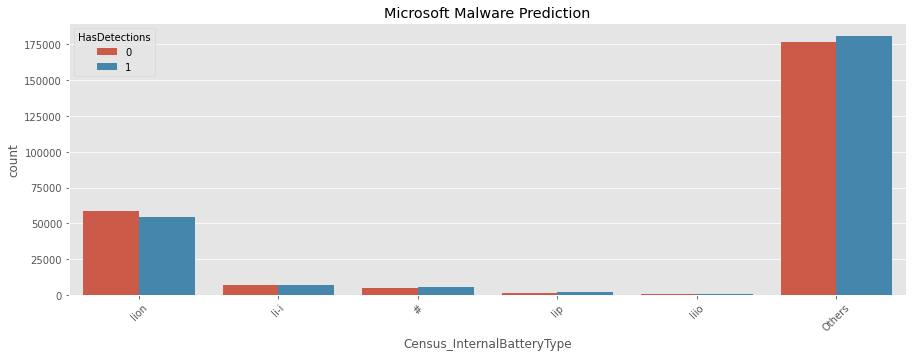

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_InternalBatteryType', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_ProcessorManufacturerIdentifier

In [ ]:
df_mmp['Census_ProcessorManufacturerIdentifier'].value_counts()

5.0     439028
1.0      58604
10.0        14
3.0          7
Name: Census_ProcessorManufacturerIdentifier, dtype: int64

In [ ]:
df_mmp['Census_ProcessorManufacturerIdentifier'] = set_Other(df_mmp, 'Census_ProcessorManufacturerIdentifier', get_num_values(df_mmp, 'Census_ProcessorManufacturerIdentifier'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

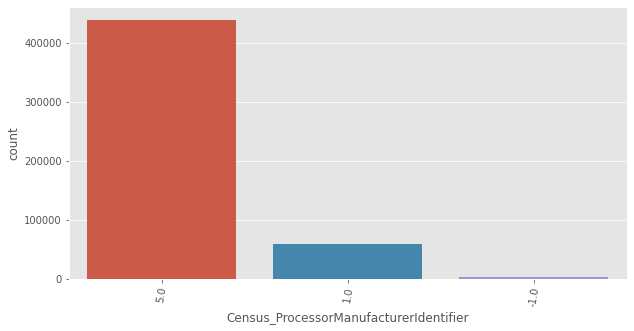

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ProcessorManufacturerIdentifier'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

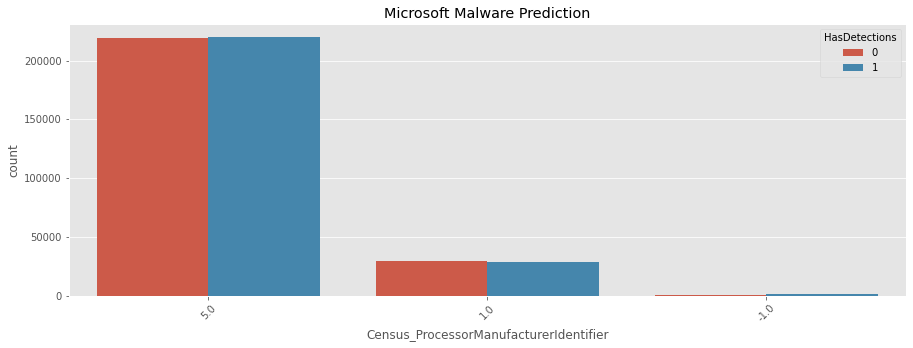

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_ProcessorManufacturerIdentifier', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

##CATEGORICAS ORDINALES

In [ ]:
##A TODAS LAS ORDINALES QUE SON VERSIONES LAS AGRUPARE Y LUEGO LAS PASARE A NUMERICAS CON ORDINAL ENCODER

###Engine Version

In [ ]:
for i in df_mmp['EngineVersion'].value_counts().keys():
  new_version= i.split('.', 4)

In [ ]:
df_mmp['EngineVersion'].value_counts(dropna=False)

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.12804.0         4
1.1.13802.0         4
1.1.13902.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0         3
1.1.14001.

In [ ]:
for i in df_mmp['EngineVersion'].value_counts().keys():
  new_version= i.split('.', 4)
  if len(new_version) >= 3:
   new_version = int(new_version[2][:2])
   df_mmp['EngineVersion'].replace(i, new_version, inplace=True)
print(df_mmp['EngineVersion'].value_counts())

15    447527
14     44475
13      7542
12       452
11         3
10         1
Name: EngineVersion, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

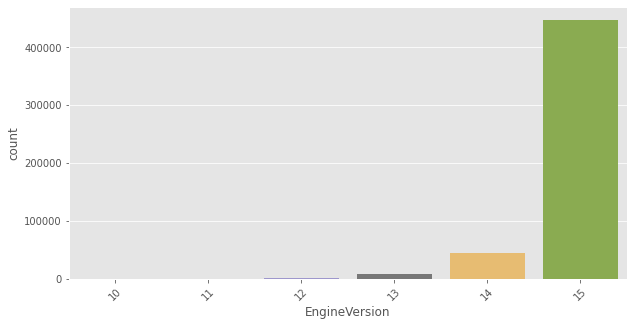

In [ ]:
#Con el histograma se puede visualizar que hay muchas etiquetas con pocos datos, por lo cual se podrian agrupar como 'Others' para que juntas sumen aproximadamente un 10% de los datos 
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['EngineVersion'])
plt.xticks(rotation=45)

In [ ]:
get_num_values(df_mmp, 'EngineVersion')

3

In [ ]:
df_mmp['EngineVersion'] = set_Other(df_mmp, 'EngineVersion', get_num_values(df_mmp, 'EngineVersion'), -1)

In [ ]:
df_mmp['EngineVersion'].value_counts()

15    447527
14     44475
13      7542
-1       456
Name: EngineVersion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

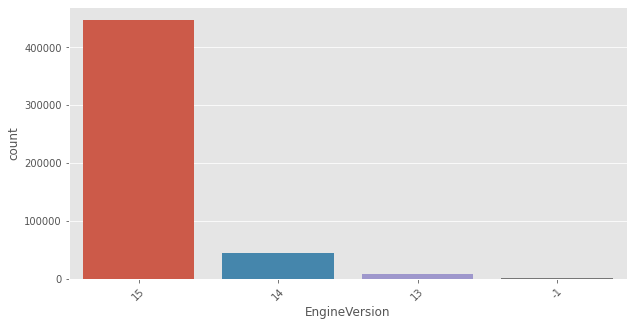

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['EngineVersion'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

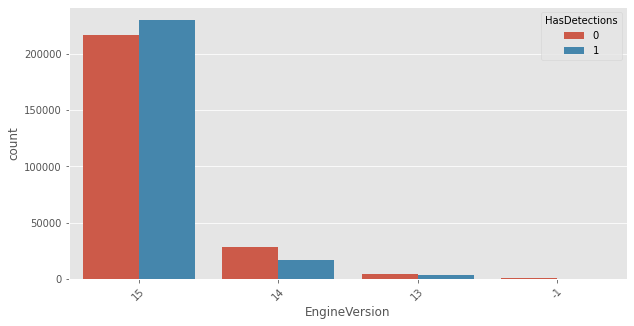

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'EngineVersion', hue = TARGET)
plt.xticks(rotation=45)

###AppVersion

In [ ]:
df_mmp['AppVersion'].value_counts().head(15)


4.18.1807.18075     288809
4.18.1806.18062      47641
4.12.16299.15        20197
4.10.209.0           15292
4.13.17134.1         14414
4.16.17656.18052     13185
4.13.17134.228       12729
4.9.10586.1106       11432
4.8.10240.17443      11385
4.14.17639.18041     10670
4.12.17007.18022      6470
4.9.10586.0           6213
4.11.15063.447        5100
4.10.14393.0          4399
4.11.15063.0          3874
Name: AppVersion, dtype: int64

In [ ]:
#voy a aplicar una funcion para agrupar las versiones 
for i in df_mmp['AppVersion'].value_counts().keys():
  new_version= i.split('.', 2)
  if len(new_version) >= 2:
   new_version = float(new_version[0]+ '.' + new_version[1])
   df_mmp['AppVersion'].replace(i, new_version, inplace=True)
print(df_mmp['AppVersion'].value_counts())



4.18    337243
4.12     30836
4.13     29076
4.10     25633
4.90     23256
4.80     15309
4.14     13727
4.16     13189
4.11     11458
4.50       126
4.70        46
4.60        44
4.40        27
4.17        22
4.15         8
Name: AppVersion, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

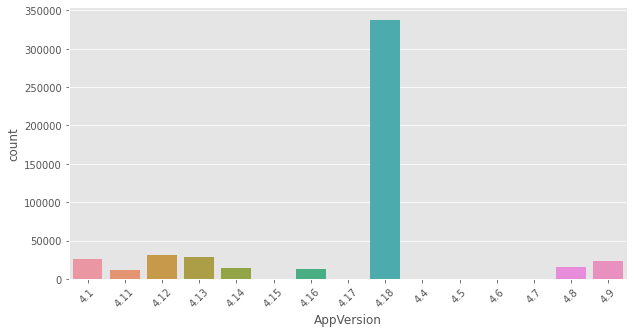

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['AppVersion'])
plt.xticks(rotation=45)

In [ ]:
df_mmp['AppVersion'] = set_Other(df_mmp, 'AppVersion', get_num_values(df_mmp, 'AppVersion'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

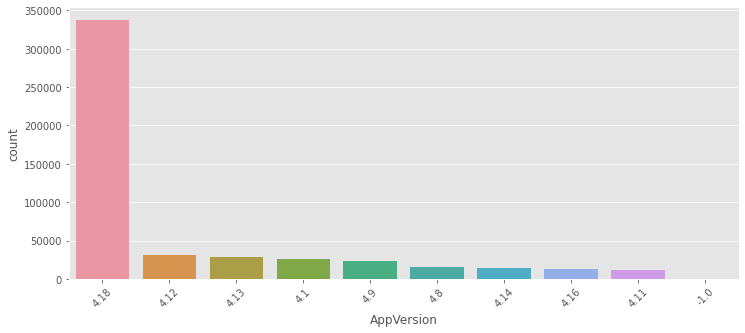

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(df_mmp['AppVersion'])
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

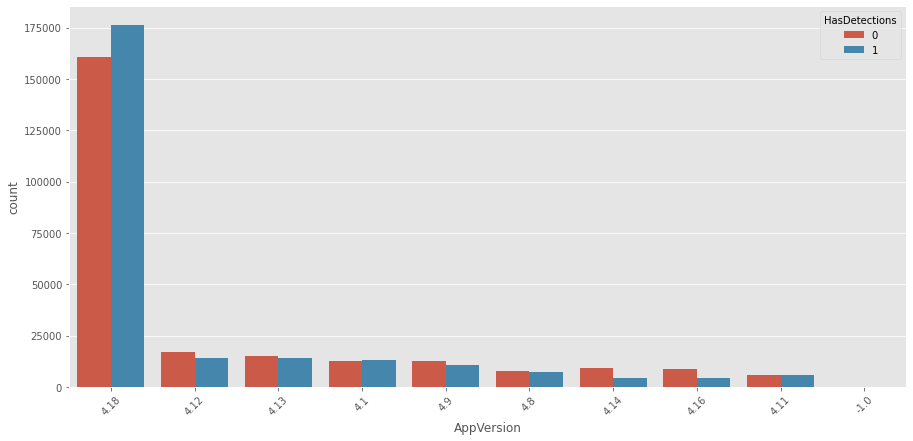

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'AppVersion', hue = TARGET)
plt.xticks(rotation=45)

###AvSigVersion

In [ ]:
df_mmp['AvSigVersion'].describe()

count           500000
unique            6455
top       1.273.1420.0
freq              5771
Name: AvSigVersion, dtype: object

In [ ]:
df_mmp['AvSigVersion'].value_counts()

1.273.1420.0    5771
1.263.48.0      5537
1.275.1140.0    5317
1.275.727.0     5214
1.273.371.0     4799
                ... 
1.235.450.0        1
1.225.3320.0       1
1.233.294.0        1
1.229.892.0        1
1.235.1538.0       1
Name: AvSigVersion, Length: 6455, dtype: int64

In [ ]:
for i in df_mmp['AvSigVersion'].value_counts().keys():
  new_version= i.split('.', 2)
  if len(new_version) >= 2:
   new_version = float(new_version[0]+ '.' + new_version[1])
   df_mmp['AvSigVersion'].replace(i, new_version, inplace=True)
print(df_mmp['AvSigVersion'].value_counts())

1.275    219654
1.273    208206
1.271     15005
1.269     12092
1.263      9004
1.267      7674
1.251      5251
1.277      4478
1.237      3873
1.261      2761
1.265      2621
1.259      1978
1.257      1338
1.253       845
1.249       821
1.247       520
1.233       518
1.245       516
1.235       482
1.239       421
1.225       334
1.255       266
1.243       262
1.241       253
1.231       245
1.229       222
1.227       209
1.223        92
1.221        39
1.207         7
0.000         4
1.217         3
1.199         3
1.213         1
1.219         1
1.169         1
Name: AvSigVersion, dtype: int64


In [ ]:
df_mmp['AvSigVersion'] = set_Other(df_mmp, 'AvSigVersion', get_num_values(df_mmp, 'AvSigVersion'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

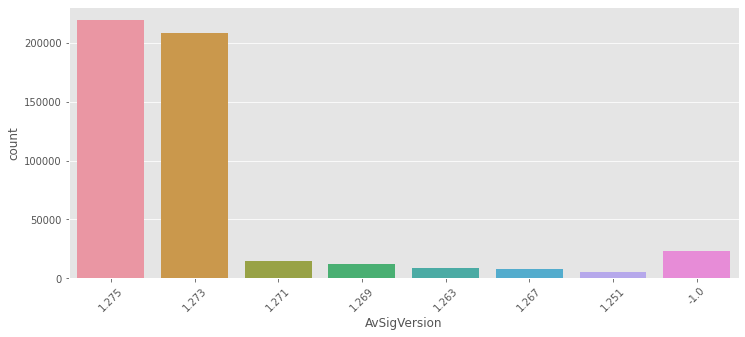

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(df_mmp['AvSigVersion'])
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

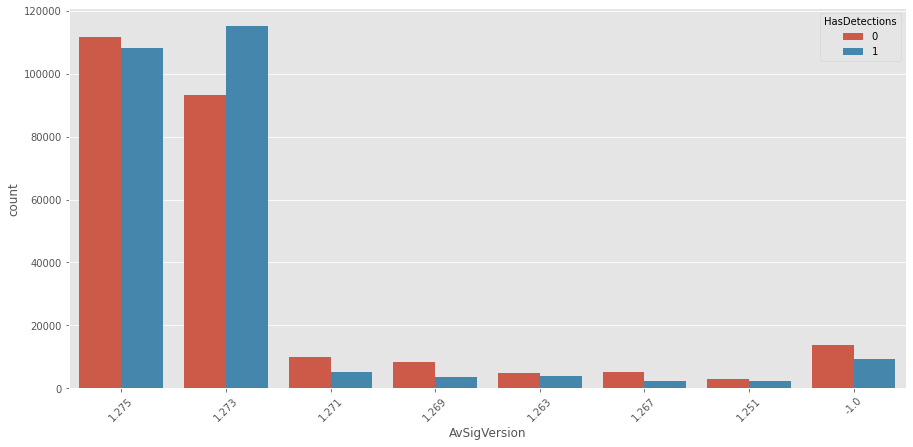

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'AvSigVersion', hue = TARGET)
plt.xticks(rotation=45)

###OsVer

In [ ]:
#se observan los valores unicos para la version del sistema operativo
df_mmp['OsVer'].unique()

array(['10.0.0.0', '6.3.0.0', '6.1.1.0', '6.1.0.0', '10.0.3.0',
       '10.0.0.112', '10.0.8.0', '10.0.4.0', '10.0.32.0', '10.0.1.0',
       '10.0.32.72', '10.0.80.0', '10.0.5.0', '10.0.2.0', '6.3.5.0',
       '6.3.1.0', '10.0.0.1', '6.3.3.0', '6.3.32.72', '6.3.7.0',
       '10.0.7.0'], dtype=object)

In [ ]:
df_mmp['OsVer'].value_counts()

10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.3.0            2
10.0.0.1           2
6.3.1.0            2
10.0.32.72         2
10.0.32.0          1
10.0.80.0          1
10.0.5.0           1
10.0.2.0           1
6.3.5.0            1
10.0.4.0           1
10.0.8.0           1
10.0.0.112         1
6.3.32.72          1
6.3.7.0            1
10.0.7.0           1
Name: OsVer, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

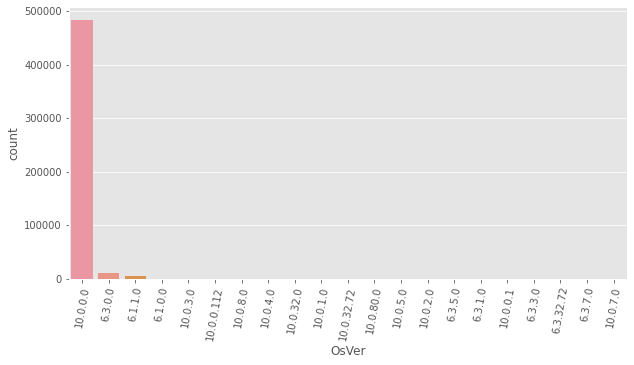

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['OsVer'])
plt.xticks(rotation=80)

In [ ]:

df_mmp['OsVer'] = set_Other(df_mmp, 'OsVer', get_num_values(df_mmp,'OsVer'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

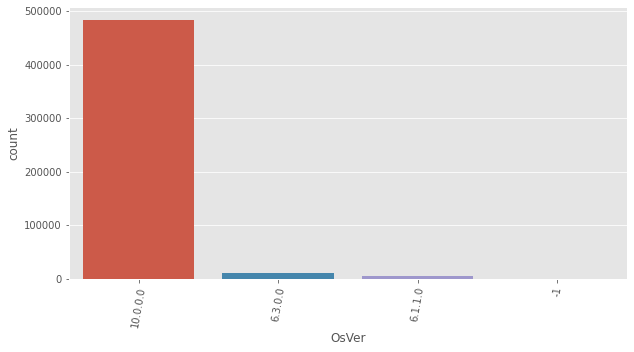

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['OsVer'])
plt.xticks(rotation=80)

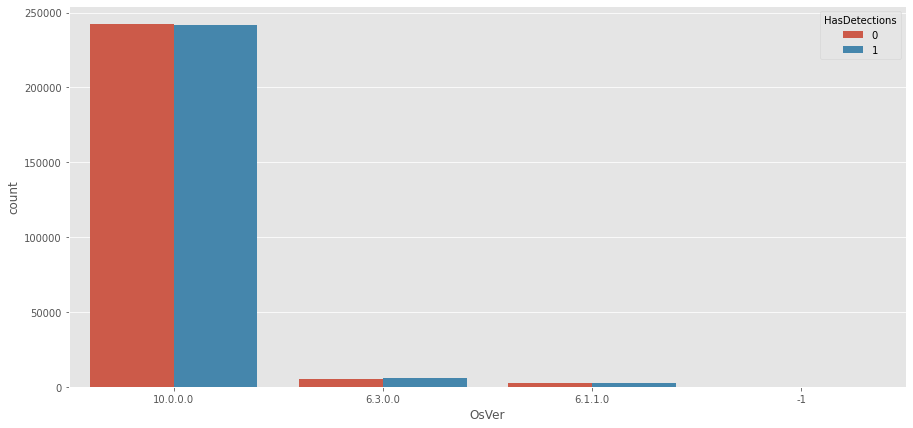

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'OsVer', hue = TARGET)

In [ ]:
pd.crosstab(df_mmp['OsVer'], df_mmp['Platform'])

Platform,windows10,windows2016,windows7,windows8
OsVer,,,,
10.0.0.0,483017,813,0,0
6.3.0.0,0,0,0,10818
6.1.1.0,0,0,5281,0
-1,31,0,33,7


In [ ]:
pd.crosstab(df_mmp['ProductName'], df_mmp['OsVer'])

OsVer,10.0.0.0,6.3.0.0,6.1.1.0,-1
ProductName,,,,
mse,79,3,5281,33
win8defender,483751,10815,0,38


In [ ]:
pd.crosstab(df_mmp['ProductName'], df_mmp['Platform'])

Platform,windows10,windows2016,windows7,windows8
ProductName,,,,
mse,79,0,5314,3
win8defender,482969,813,0,10822


In [ ]:
##ANALIZANDO ESTAS TRES VARIABLES JUNTAS SE OBSERVA QUE LOS DATOS DEL OSVERSION Y PLATFORM DAN PRACTICAMENTE LA MISMA INFORMACION, PERO EL OSVERSION 
#TIENE UNA ETIQUETA MAYORITARIA
#LOS DATOS REELEVANTES SON DE AQUELLAS MAQUINAS CON WINDOWS 10 Y 8. ADEMAS ANALIZANDO LA VARIBLE DEFENDER SE VE QUE EL MAS FRECUENTE
# ES AQUEL QUE OPERA JUSTAMENTE EN ESTAS ULTIMAS DOS VERSIONES DE WINDOWS
#POR LO QUE SE ELIMINARAN LAS COLUMNAS DE OSVERSION YA QUE SE CONSIDERA LA DE PLATFORM TIENE INFORMACION MAS VARIADA E INCLUYE
df_mmp.drop('OsVer', axis=1, inplace=True)

###Census_OSVersion

In [ ]:
df_mmp['Census_OSVersion'].value_counts()

10.0.17134.228     79975
10.0.17134.165     50511
10.0.16299.431     30519
10.0.17134.285     26289
10.0.17134.112     19501
                   ...  
10.0.18214.1000        1
10.0.15019.1000        1
10.0.14328.1000        1
10.0.10586.601         1
10.0.15048.0           1
Name: Census_OSVersion, Length: 305, dtype: int64

In [ ]:
for i in df_mmp['Census_OSVersion'].value_counts().keys():
  new_version= i.split('.')
  if len(new_version) >= 2:
   new_version = float(new_version[0]+ '.' + new_version[1]+new_version[2][:3])
   df_mmp['Census_OSVersion'].replace(i, new_version, inplace=True)
print(df_mmp['Census_OSVersion'].value_counts())

10.0171    226000
10.0162    136573
10.0150     44265
10.0143     43703
10.0105     33193
10.0102     15106
10.0177       842
10.0176       262
10.0182        43
10.0149         5
10.0170         3
6.3960          1
10.0110         1
10.0142         1
10.0144         1
10.0161         1
Name: Census_OSVersion, dtype: int64


In [ ]:
df_mmp['Census_OSVersion'].head()

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    10.0171
fd5ba6f5b75325ec0423a6c67cc75942    10.0171
4e628391e7cc7c482fb3286f486dbd25    10.0105
270a2e9d028144a4df12a9e3da79fba5    10.0171
06ca8fa8d32c2abdc5b3577d676b3269    10.0171
Name: Census_OSVersion, dtype: float64

In [ ]:
df_mmp['Census_OSVersion'] = set_Other(df_mmp, 'Census_OSVersion', get_num_values(df_mmp, 'Census_OSVersion'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

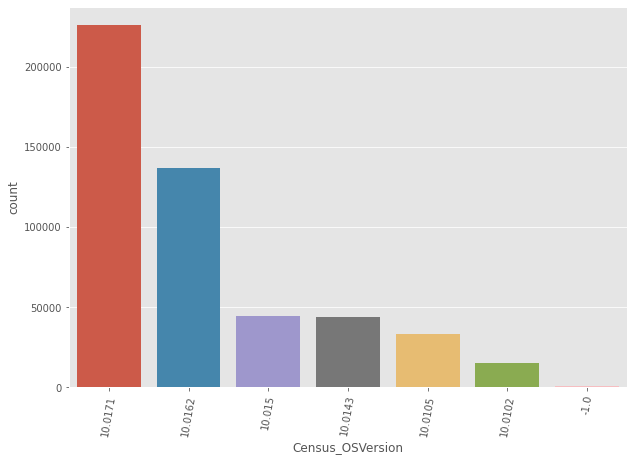

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df_mmp['Census_OSVersion'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

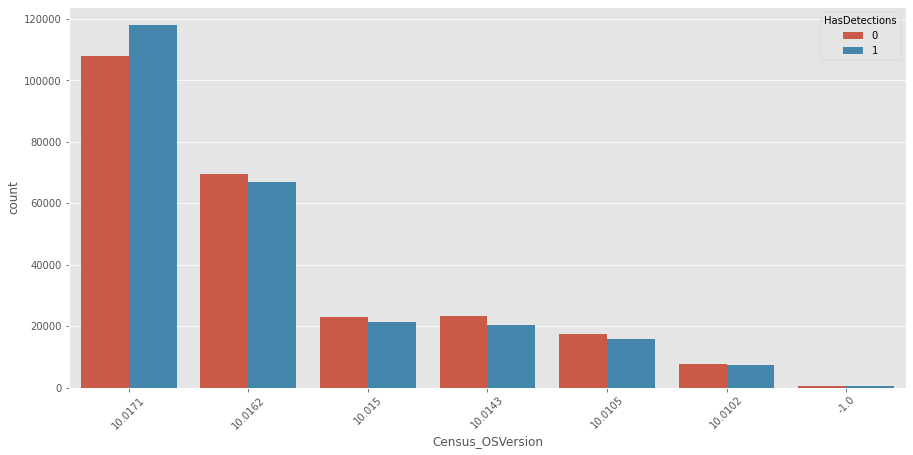

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df_mmp, x= 'Census_OSVersion', hue = TARGET)
plt.xticks(rotation=45)

###RtpStateBitfield

In [ ]:
df_mmp['RtpStateBitfield'].value_counts(dropna=False)

7.0     484841
0.0      10610
NaN       1832
8.0       1277
5.0       1158
3.0        176
1.0        105
35.0         1
Name: RtpStateBitfield, dtype: int64

In [ ]:
df_mmp['RtpStateBitfield'] = set_Other(df_mmp, 'RtpStateBitfield', get_num_values(df_mmp, 'RtpStateBitfield'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

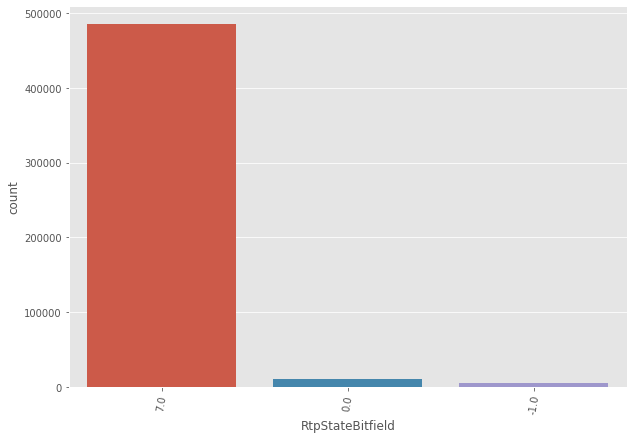

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df_mmp['RtpStateBitfield'])
plt.xticks(rotation=80)

###UacLuaenable

In [ ]:
df_mmp['UacLuaenable'].value_counts(dropna=False)

1.0          496276
0.0            3086
NaN             623
48.0             13
2.0               1
6357062.0         1
Name: UacLuaenable, dtype: int64

In [ ]:
df_mmp['UacLuaenable'] = set_Other(df_mmp, 'UacLuaenable', get_num_values(df_mmp, 'UacLuaenable'))

Text(0.5, 1.0, 'Microsoft Malware Prediction')

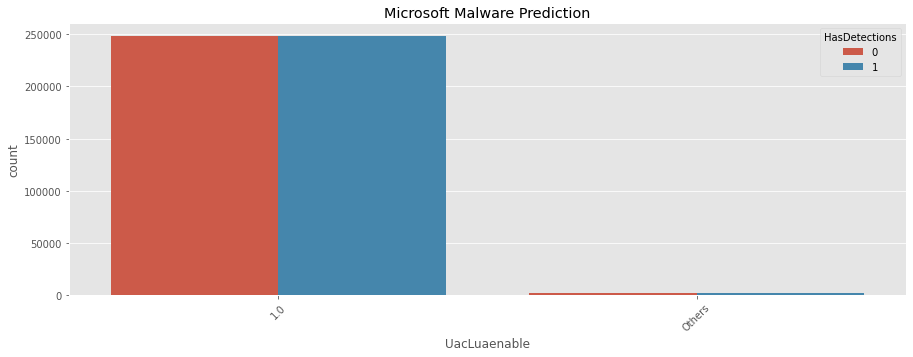

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'UacLuaenable', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#ESTA VARIABLE TIENE PRACTICAMENTE UNA SOLA ETIQUETA POR LO QUE LA VOY A ELIMINAR
df_mmp.drop('UacLuaenable', axis=1, inplace=True)

###Census_ProcessorCoreCount

In [ ]:
df_mmp['Census_ProcessorCoreCount'].value_counts()

4.0     304102
2.0     129178
8.0      48995
12.0      5184
6.0       4023
1.0       3980
16.0      1006
3.0        752
32.0       113
20.0        97
24.0        95
40.0        39
28.0        17
36.0        16
48.0        15
5.0         10
10.0        10
56.0         8
7.0          3
11.0         2
64.0         2
52.0         1
44.0         1
88.0         1
80.0         1
14.0         1
46.0         1
Name: Census_ProcessorCoreCount, dtype: int64

In [ ]:
df_mmp['Census_ProcessorCoreCount'] = set_Other(df_mmp, 'Census_ProcessorCoreCount', get_num_values(df_mmp, 'Census_ProcessorCoreCount'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

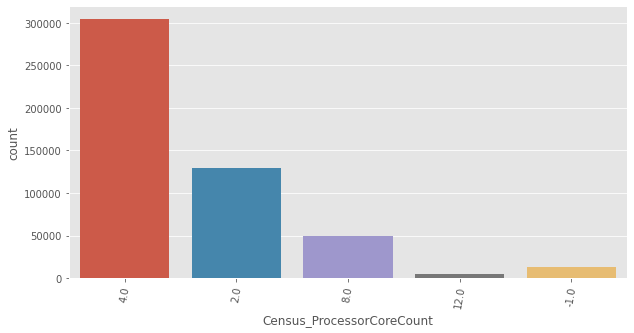

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ProcessorCoreCount'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

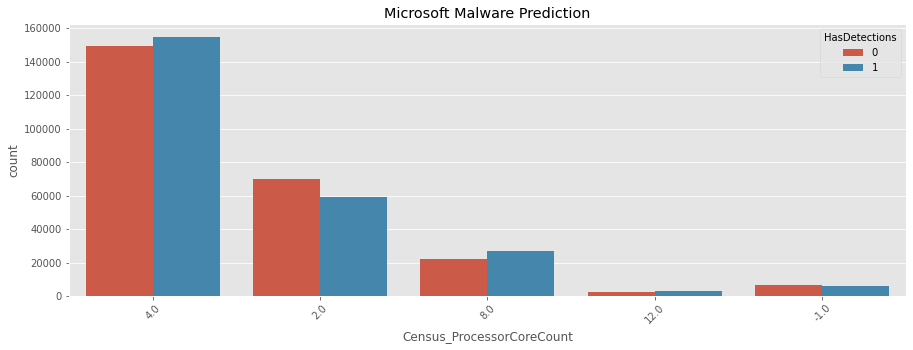

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_ProcessorCoreCount', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#AQUI VEMOS QUE AQUELLOS QUE TIENEN MAS NUCLEOS TIENEN TAMBIEN MAS DETECCIONES (los de 4, 8 y 12 mayor a los de 2 )

###Census_PrimaryDiskTotalCapacity

In [ ]:
df_mmp['Census_PrimaryDiskTotalCapacity'].value_counts()

476940.0    158683
953869.0    122183
305245.0     26687
122104.0     26444
244198.0     25159
             ...  
948333.0         1
20646.0          1
122069.0         1
190652.0         1
152499.0         1
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: int64

In [ ]:
df_mmp['Census_PrimaryDiskTotalCapacity'] = set_Other(df_mmp, 'Census_PrimaryDiskTotalCapacity', get_num_values(df_mmp, 'Census_PrimaryDiskTotalCapacity'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

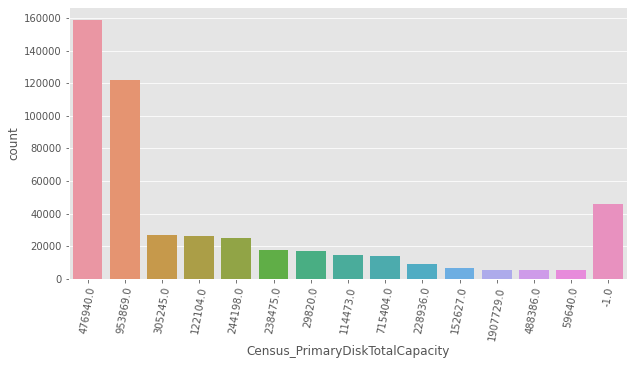

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_PrimaryDiskTotalCapacity'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

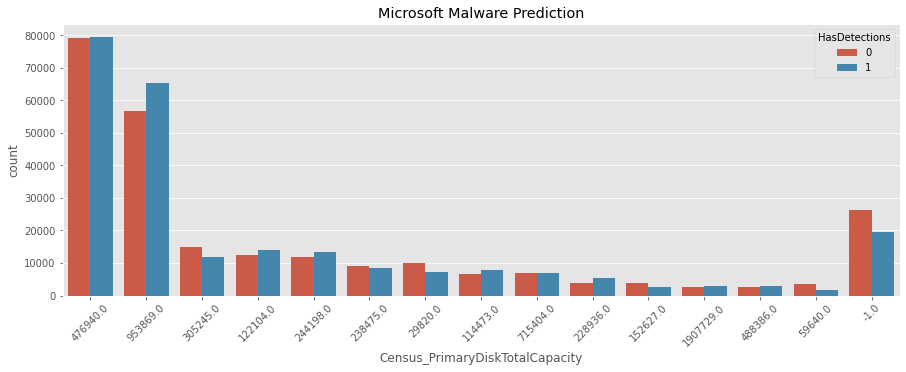

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_PrimaryDiskTotalCapacity', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_SystemVolumeTotalCapacity

In [ ]:
df_mmp['Census_SystemVolumeTotalCapacity'].value_counts(dropna=False)

NaN         2976
28542.0     2922
926992.0    2866
476389.0    2380
476324.0    2306
            ... 
221517.0       1
580181.0       1
127615.0       1
236484.0       1
470309.0       1
Name: Census_SystemVolumeTotalCapacity, Length: 142052, dtype: int64

In [ ]:
#en este caso tambien tengo muchas etiquetas y valores bajos muy distribuidos. Por lo que decido eliminarla 
df_mmp.drop('Census_SystemVolumeTotalCapacity', axis=1, inplace=True)

###Census_TotalPhysicalRAM

In [ ]:
df_mmp['Census_TotalPhysicalRAM'].value_counts()

4096.0     228678
8192.0     123174
2048.0      61694
16384.0     30179
6144.0      22349
            ...  
12963.0         1
5791.0          1
4124.0          1
5039.0          1
4120.0          1
Name: Census_TotalPhysicalRAM, Length: 552, dtype: int64

In [ ]:
df_mmp['Census_TotalPhysicalRAM'] = set_Other(df_mmp, 'Census_TotalPhysicalRAM', get_num_values(df_mmp, 'Census_TotalPhysicalRAM'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

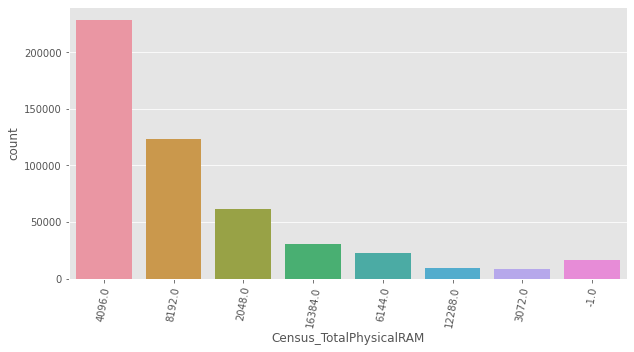

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_TotalPhysicalRAM'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

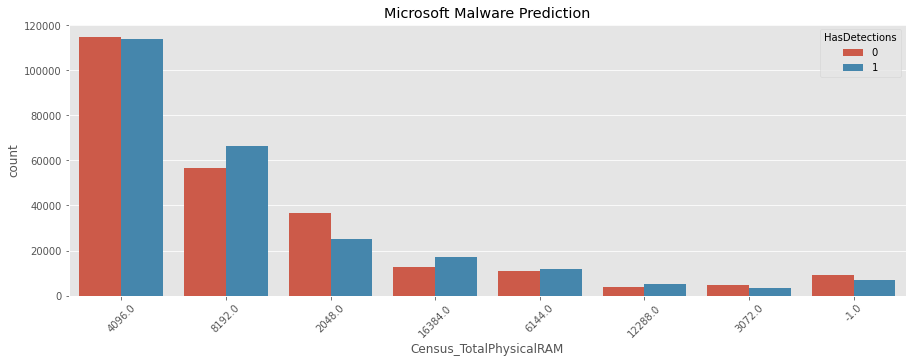

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_TotalPhysicalRAM', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_InternalBatteryNumberOfCharges

In [ ]:
df_mmp['Census_InternalBatteryNumberOfCharges'].value_counts()

0.000000e+00    283189
4.294967e+09    126436
1.000000e+00      2955
1.600000e+01      1517
2.000000e+00      1503
                 ...  
8.331000e+03         1
5.772700e+04         1
1.030000e+03         1
4.354400e+04         1
1.900000e+03         1
Name: Census_InternalBatteryNumberOfCharges, Length: 5248, dtype: int64

In [ ]:
df_mmp['Census_InternalBatteryNumberOfCharges'] = set_Other(df_mmp, 'Census_InternalBatteryNumberOfCharges', get_num_values(df_mmp, 'Census_InternalBatteryNumberOfCharges'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

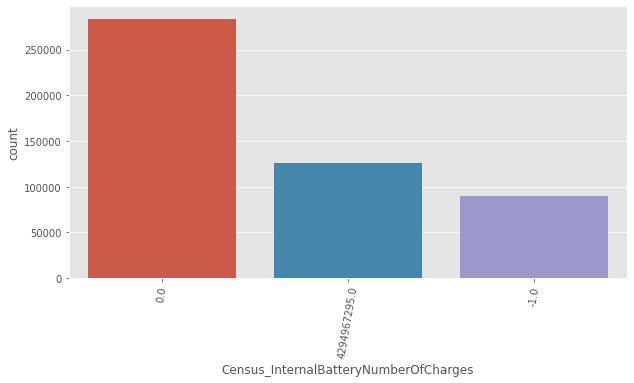

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_InternalBatteryNumberOfCharges'])
plt.xticks(rotation=80)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(0.5, 1.0, 'Microsoft Malware Prediction')

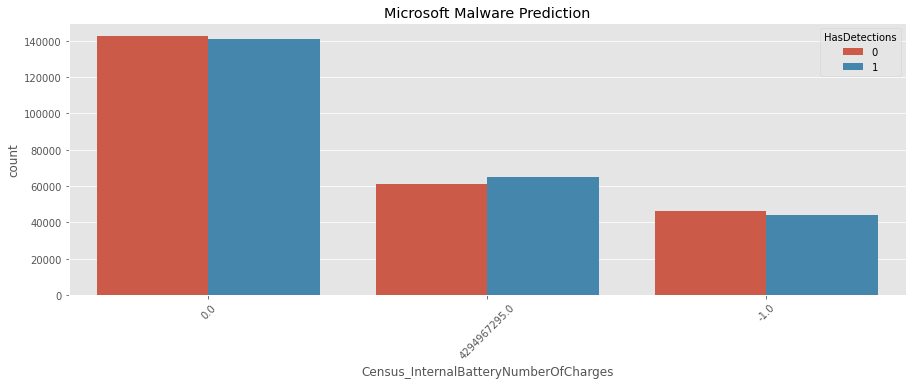

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_InternalBatteryNumberOfCharges', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_OSBuildNumber

In [ ]:
df_mmp['Census_OSBuildNumber'].value_counts()

17134    225979
16299    136572
15063     44262
14393     43702
10586     33193
          ...  
9600          1
17074         1
17753         1
15042         1
15048         1
Name: Census_OSBuildNumber, Length: 61, dtype: int64

In [ ]:
df_mmp['Census_OSBuildNumber'] = set_Other(df_mmp, 'Census_OSBuildNumber', get_num_values(df_mmp, 'Census_OSBuildNumber'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

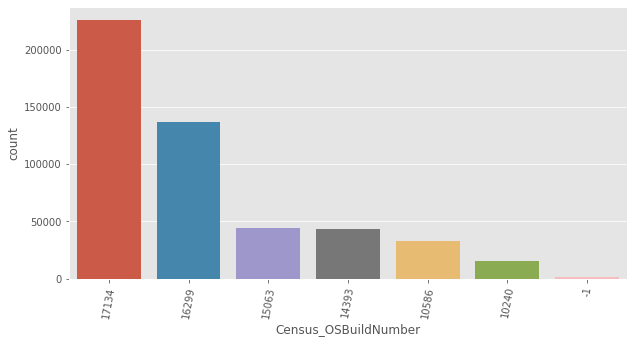

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSBuildNumber'])
plt.xticks(rotation=80)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

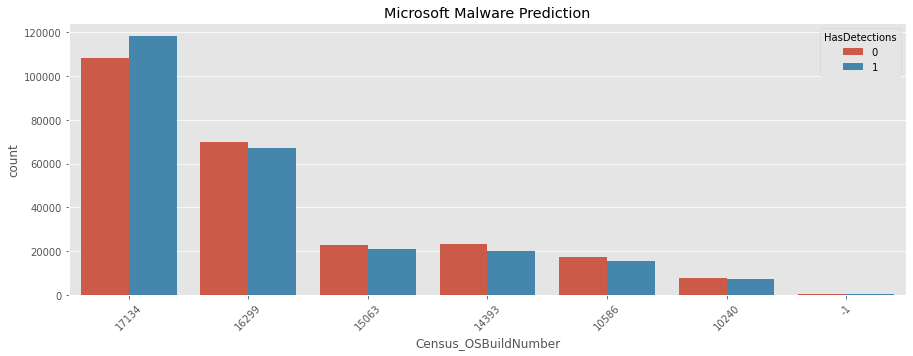

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_OSBuildNumber', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_OSBuildRevision

In [ ]:
df_mmp['Census_OSBuildRevision'].value_counts()

228      79975
165      50511
431      30519
285      26289
112      19503
         ...  
17643        1
1230         1
491          1
206          1
16399        1
Name: Census_OSBuildRevision, Length: 242, dtype: int64

In [ ]:
df_mmp['Census_OSBuildRevision'] = set_Other(df_mmp, 'Census_OSBuildRevision', get_num_values(df_mmp, 'Census_OSBuildRevision'), -1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

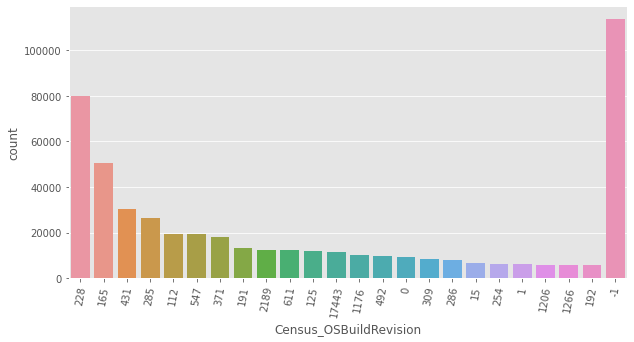

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_OSBuildRevision'])
plt.xticks(rotation=80)



Text(0.5, 1.0, 'Microsoft Malware Prediction')

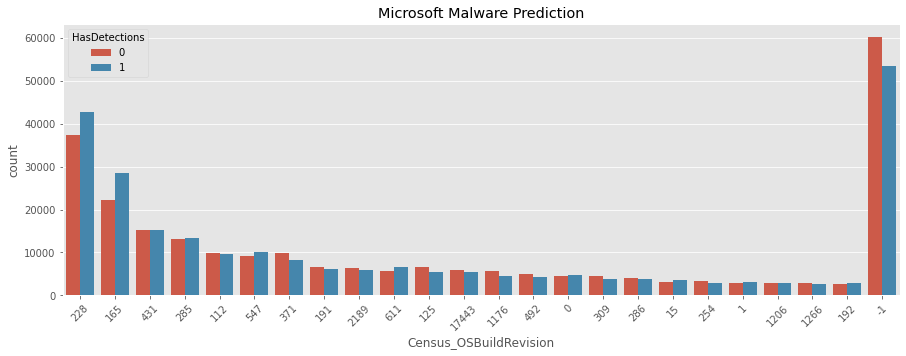

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_OSBuildRevision', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

##Variables numericas y boolenas




#####Algunas de estas variables que tienen NaN se les asignara un valor extremo como en los casos de las categoricas 

###IsSxsPassiveMode

In [ ]:
df_mmp['IsSxsPassiveMode'].value_counts(dropna=False)

0    491379
1      8621
Name: IsSxsPassiveMode, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

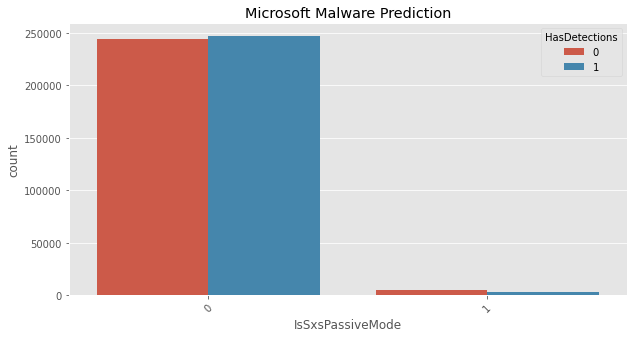

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'IsSxsPassiveMode', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#ESTA VARIABLE PUEDE TENER UNA ALTA RELACION CON EL TARGET, YA QUE NOS INDICA QUE AQUELLAS MAQUINAS QUE ESTAN EN MODO PASIVO O ACTIVO Y ESO
#PUEDE HACERLAS MAS O MENOS PROPENSAS A QUE LES DETECTEN INFECCIONES POR MAS QUE NOS INDIQUE QUE LA MAYORIA ESTA
#EN MODO ACTIVO LA DEJO
#aquellos valores que estan en menos del 50% tienen menos chance de has infections, los que estan sobre tienen mas chance

###AVProductsInstalled

In [ ]:
df_mmp['AVProductsInstalled'].value_counts(dropna=False)

1.0    348046
2.0    137856
3.0     11617
NaN      1938
4.0       514
5.0        29
Name: AVProductsInstalled, dtype: int64

In [ ]:
#EN ESTE CASO A LOS NULOS LOS VOY A RELLENAR CON LA MODA Y LAS DEMAS LAS DEJO COMO ESTAN 
df_mmp['AVProductsInstalled'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

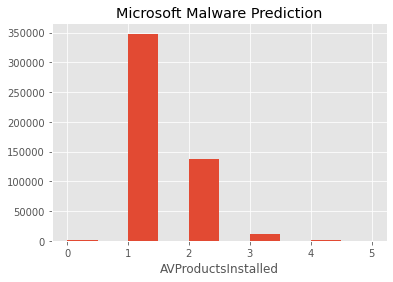

In [ ]:
df_mmp['AVProductsInstalled'].hist()
plt.xlabel('AVProductsInstalled')
plt.title('Microsoft Malware Prediction')

Text(0.5, 1.0, 'Microsoft Malware Prediction')

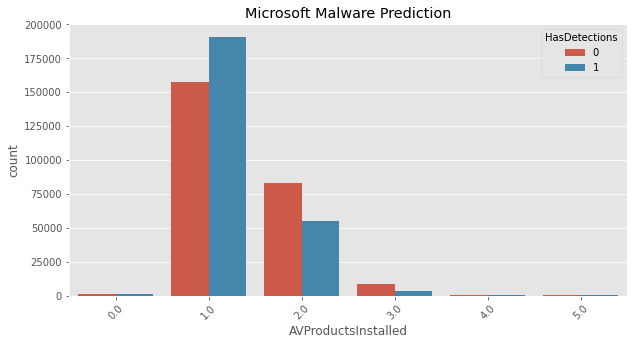

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'AVProductsInstalled', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###AVProductsEnabled

In [ ]:
df_mmp['AVProductsEnabled'].value_counts(dropna=False)

1.0    485179
2.0     11074
NaN      1938
0.0      1467
3.0       316
4.0        26
Name: AVProductsEnabled, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

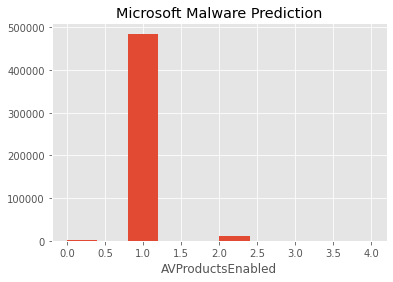

In [ ]:
df_mmp['AVProductsEnabled'].hist()
plt.xlabel('AVProductsEnabled')
plt.title('Microsoft Malware Prediction')

Text(0.5, 1.0, 'Microsoft Malware Prediction')

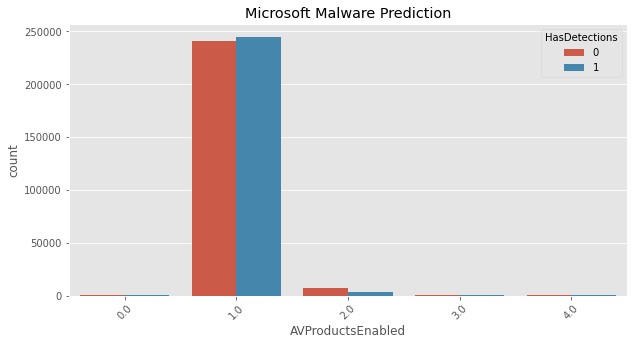

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'AVProductsEnabled', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
df_mmp['AVProductsEnabled'].fillna(0, inplace=True)

In [ ]:
#PUEDO CORRELACIONAR ESTAS DOS VARIABLES CON UN CROSSTAB 
#ESTO ME DA LA CANTIDAD DE PRODUCTOS INSTALADOS Y LA CANTIDAD DE HABILITADOS, EN LOS HABILITADOS VEMOS Q EN SU MAYORIA INDEPENDIENTEMENTE DE LA CANTIDAD DE INSTLADOS
#SOLO HABILITAN UNO

In [ ]:
pd.crosstab(df_mmp['AVProductsInstalled'], df_mmp['AVProductsEnabled'])

AVProductsEnabled,0.0,1.0,2.0,3.0,4.0
AVProductsInstalled,,,,,
0.0,1938,0,0,0,0
1.0,826,347220,0,0,0
2.0,564,129699,7593,0,0
3.0,75,8034,3283,225,0
4.0,2,222,185,86,19
5.0,0,4,13,5,7


###IsBeta

In [ ]:
df_mmp['IsBeta'].value_counts()

0    499999
1         1
Name: IsBeta, dtype: int64

In [ ]:
#VEO QUE ESTA VARIABLE TIENE UNA SOLA ETIQUETA MAYORITARIA, UN SOLO VALOR EN 1 POR LO QUE NO ME APORTA INFORMACION Y LA ELIMINO

In [ ]:
df_mmp.drop('IsBeta',axis=1, inplace=True)

###HasTpm

In [ ]:
df_mmp['HasTpm'].value_counts(dropna=False)

1    493908
0      6092
Name: HasTpm, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

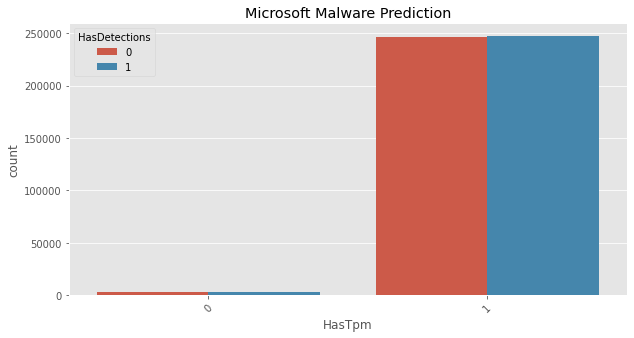

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_mmp, x= 'HasTpm', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#VEMOS QUE LA MAYORIA DE LAS MAQUINAS TIENE TPM Y HACIENDO UN CROSSTAB CON EL TARGET VEMOS QUE ESTAN DISTRIBUIDAS EQUITATIVAMENTE, VOY A PROBAR Y LA OTRA OPCION ES ELIMINARLA

In [ ]:
pd.crosstab(df_mmp['HasTpm'], df_mmp[TARGET])

HasDetections,0,1
HasTpm,,
0,3244,2848
1,246803,247105


###IsProtected

In [ ]:
df_mmp['IsProtected'].value_counts(dropna=False)

1.0    471073
0.0     27001
NaN      1926
Name: IsProtected, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

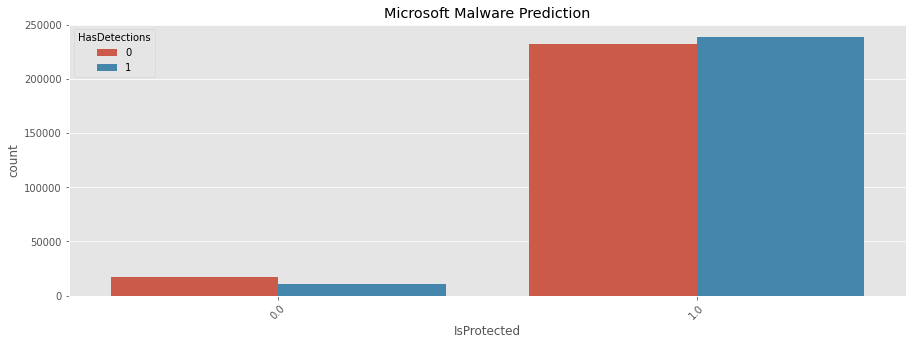

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'IsProtected', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
df_mmp['IsProtected'].fillna(0.0, inplace=True)

In [ ]:
df_mmp['IsProtected'].isnull().sum()

0

In [ ]:
#A ESTA VARIABLE LA DEJO COMO ESTA YA QUE ME INDICA CON LOS NULOS QUE NO ESTA PROTEGIDA POR UN ANTIVIRUS POR LO CUAL TAMBIEN ES DATO ENTONCES PONDRE LOS NULOS EN 0 DIRECTAMENTE

###AutoSampleOptIn

In [ ]:
df_mmp['AutoSampleOptIn'].value_counts(dropna=False)

0    499986
1        14
Name: AutoSampleOptIn, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

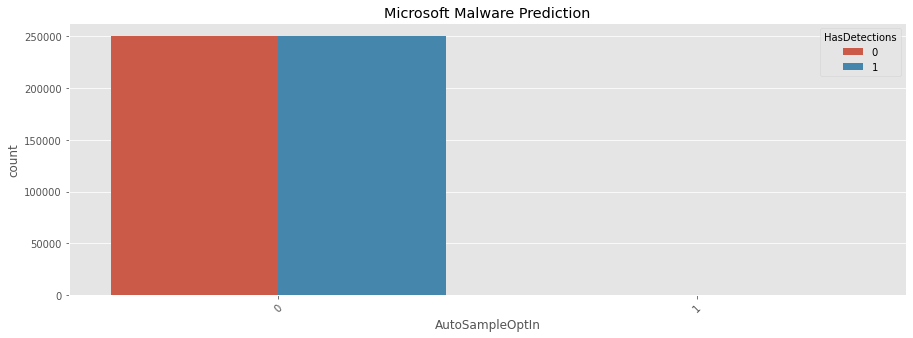

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'AutoSampleOptIn', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#ESTA VARIABLE TIENE PRACTICAMENTE UNA SOLA ETIQUETA ENTONCES LA ELIMINO
df_mmp.drop('AutoSampleOptIn', axis=1, inplace=True)


###SMode

In [ ]:
df_mmp['SMode'].value_counts(dropna=False)

0.0    469946
NaN     29848
1.0       206
Name: SMode, dtype: int64

In [ ]:
df_mmp['SMode'].isnull().sum()

29848

In [ ]:
#LOS NULOS LOS PONDRE DENTRO DEL VALOR MAS FRECUENTE 0

In [ ]:
df_mmp['SMode'].fillna(0.0, inplace=True)

In [ ]:
df_mmp['SMode'].isnull().sum()

0

Text(0.5, 1.0, 'Microsoft Malware Prediction')

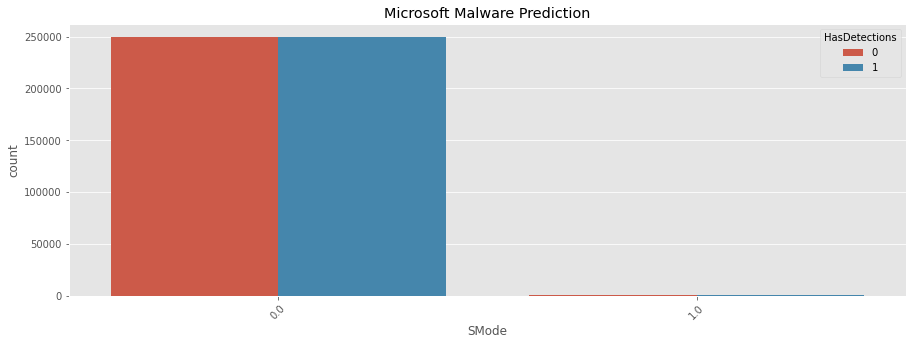

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'SMode', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#la elimino porque tambien tiene practicamente solo una etiqueta 
df_mmp.drop('SMode', axis= 1, inplace=True)

###Firewall

In [ ]:
df_mmp['Firewall'].value_counts(dropna=False)

1.0    484071
0.0     10767
NaN      5162
Name: Firewall, dtype: int64

In [ ]:
df_mmp['Firewall'].isnull().sum()

5162

Text(0.5, 1.0, 'Microsoft Malware Prediction')

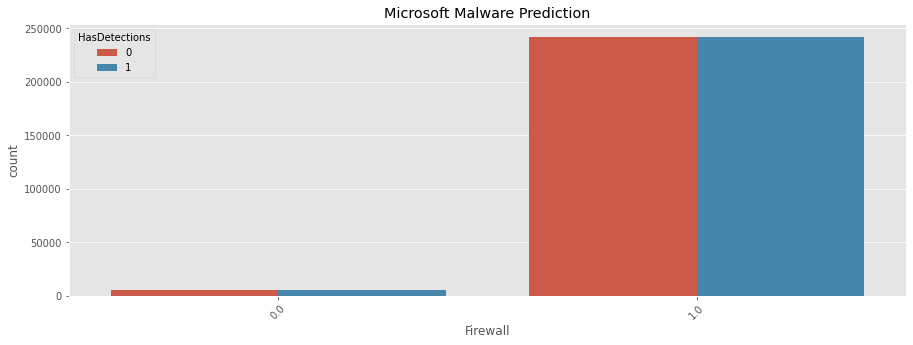

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Firewall', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
df_mmp['Firewall'] = df_mmp['Firewall'].fillna(0)

###Census_HasOpticalDiskDrive

In [ ]:
df_mmp['Census_HasOpticalDiskDrive'].value_counts(dropna=False)

0    461483
1     38517
Name: Census_HasOpticalDiskDrive, dtype: int64

In [ ]:
df_mmp['Census_HasOpticalDiskDrive'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

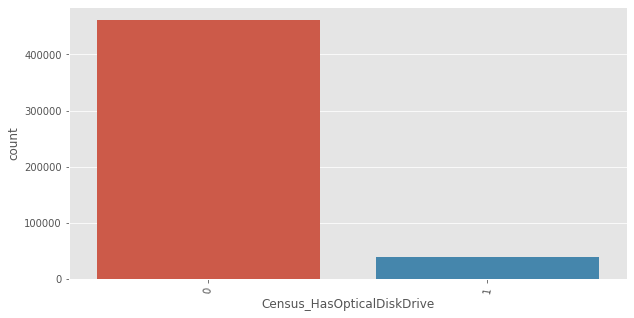

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_HasOpticalDiskDrive'])
plt.xticks(rotation=80)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

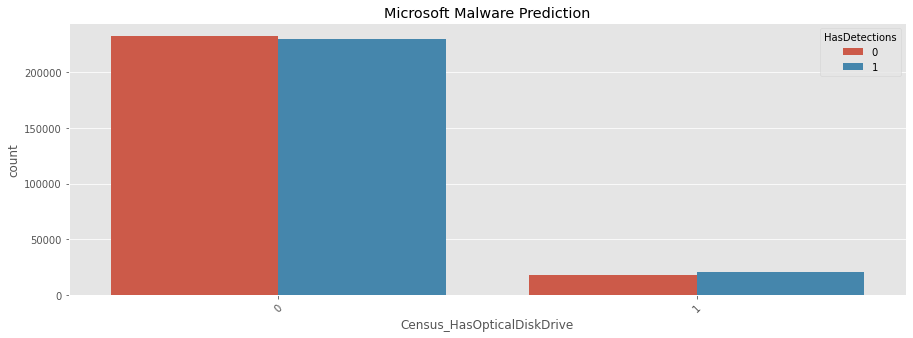

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_HasOpticalDiskDrive', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#AQUI VEMOS QUE A PESAR DE QUE LAS QUE TIENEN DISCO OPTICO PUEDAN SER MAS ANTIGUAS, EN RELACION AL TARGET NO SE OBSERVAN VARIACIONES MUY SIGNIFICANTES

###Census_IsPortableOperatingSystem

In [ ]:
df_mmp['Census_IsPortableOperatingSystem'].value_counts(dropna=False)

0    499739
1       261
Name: Census_IsPortableOperatingSystem, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

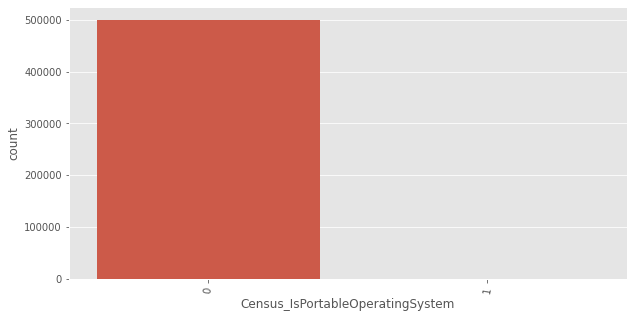

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_IsPortableOperatingSystem'])
plt.xticks(rotation=80)

In [ ]:
##ESTA VARIABLE TIENE PRACTICAMENTE UNA SOLA ETIQUETA CON DATOS, 261 SON MUY POCOS COMO PARA UTILIZAR ESTA VARIABLE EN EL MODELO, ASI QUE LA ELIMNO

In [ ]:
df_mmp.drop('Census_IsPortableOperatingSystem', axis= 1, inplace=True)

###Census_IsFlightsDisabled

In [ ]:
df_mmp['Census_IsFlightsDisabled'].value_counts(dropna=False)

0.0    491060
NaN      8933
1.0         7
Name: Census_IsFlightsDisabled, dtype: int64

In [ ]:
#CON ESTA VARIABLE HARE LO MISMO QUE CON LA ANTERIOR PORQUE TIENE MUY POCOS DATOS DE UNA ETIQUETA Y NO ME AYUDARIA EN EL MODELO
df_mmp.drop('Census_IsFlightsDisabled', axis= 1, inplace=True)

###Census_ThresholdOptIn

In [ ]:
df_mmp['Census_ThresholdOptIn'].value_counts(dropna=False)

NaN    318104
0.0    181849
1.0        47
Name: Census_ThresholdOptIn, dtype: int64

In [ ]:
df_mmp['Census_ThresholdOptIn'].isnull().sum()

318104

In [ ]:
df_mmp['Census_ThresholdOptIn'] = df_mmp['Census_ThresholdOptIn'].fillna(-1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

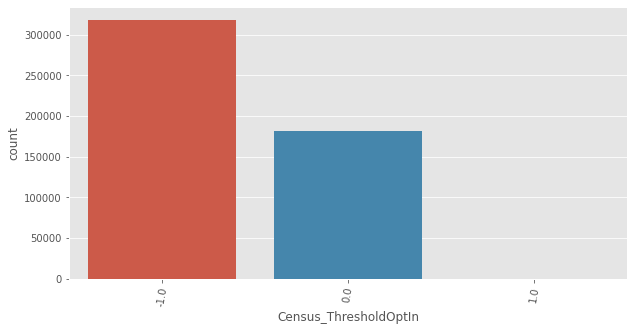

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_ThresholdOptIn'])
plt.xticks(rotation=80)

###Census_IsSecureBootEnabled

In [ ]:
df_mmp['Census_IsSecureBootEnabled'].value_counts(dropna=False)

0    257281
1    242719
Name: Census_IsSecureBootEnabled, dtype: int64

In [ ]:
df_mmp['Census_IsSecureBootEnabled'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

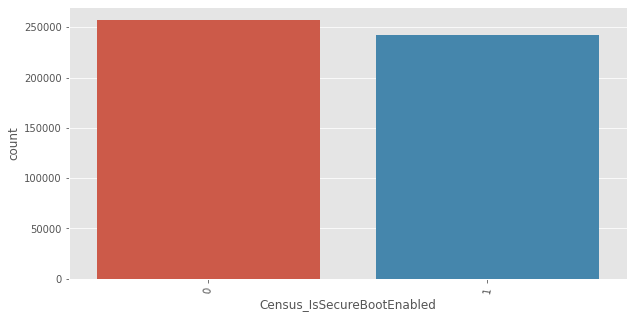

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_IsSecureBootEnabled'])
plt.xticks(rotation=80)

###Census_IsWIMBootEnabled

In [ ]:
df_mmp['Census_IsWIMBootEnabled'].value_counts(dropna=False)

NaN    317666
0.0    182334
Name: Census_IsWIMBootEnabled, dtype: int64

In [ ]:
df_mmp['Census_IsWIMBootEnabled'].isnull().sum()

317666

In [ ]:
#ESTA VARIABLE ES UN BOOLEAN PERO TIENE MUCHOS NULOS, NO PUEDO ASUMIR QUE ESTOS SEAN 1 O 0, voy a rellenar con otro valor
df_mmp['Census_IsWIMBootEnabled'] = df_mmp['Census_IsWIMBootEnabled'].fillna(-1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

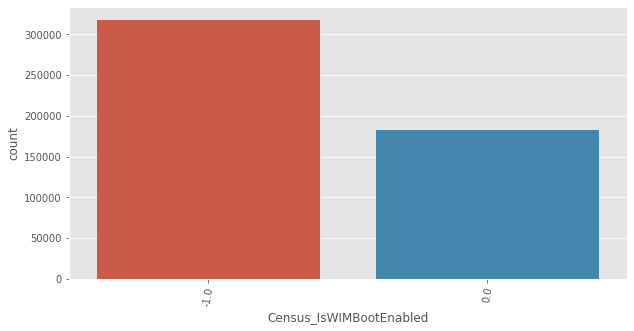

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_IsWIMBootEnabled'])
plt.xticks(rotation=80)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

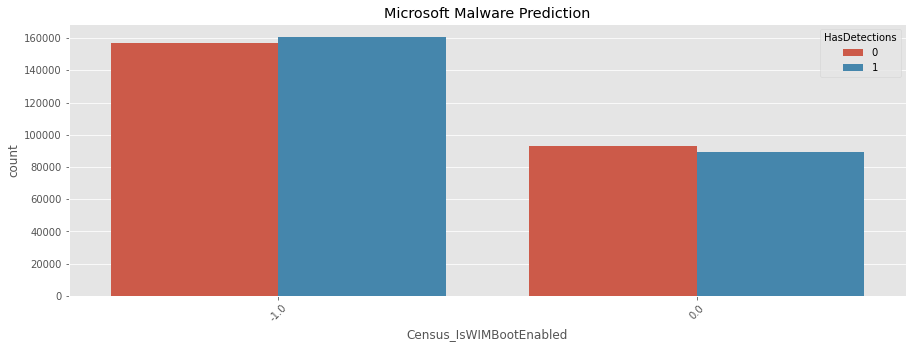

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_IsWIMBootEnabled', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_IsVirtualDevice

In [ ]:
df_mmp['Census_IsVirtualDevice'].value_counts(dropna=False)

0.0    495572
1.0      3527
NaN       901
Name: Census_IsVirtualDevice, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

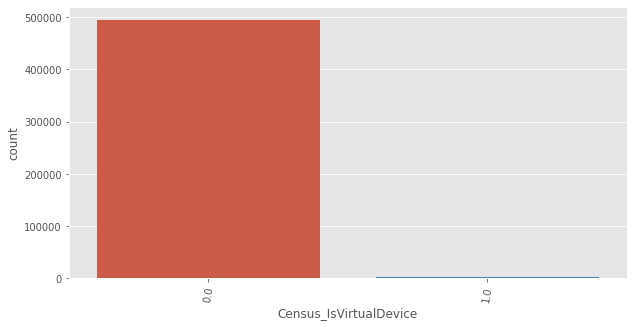

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_IsVirtualDevice'])
plt.xticks(rotation=80)

In [ ]:
#ELIMINARE ESTA VARIABLE PORQUE TIENE MUY POCOS DATOS DE UNA ETIQUETA Y NO ME AYUDARIA EN EL MODELO
df_mmp.drop('Census_IsVirtualDevice', axis= 1, inplace=True)

###Census_IsTouchEnabled

In [ ]:
df_mmp['Census_IsTouchEnabled'].value_counts(dropna=False)

0    437283
1     62717
Name: Census_IsTouchEnabled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

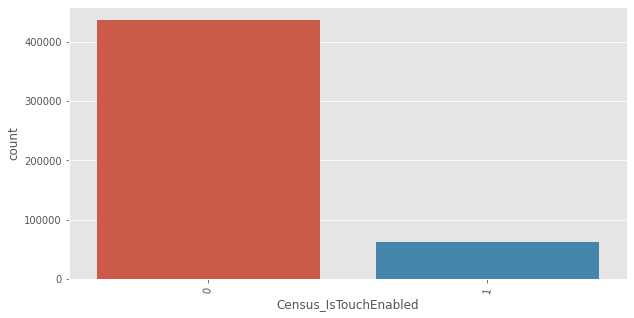

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_IsTouchEnabled'])
plt.xticks(rotation=80)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

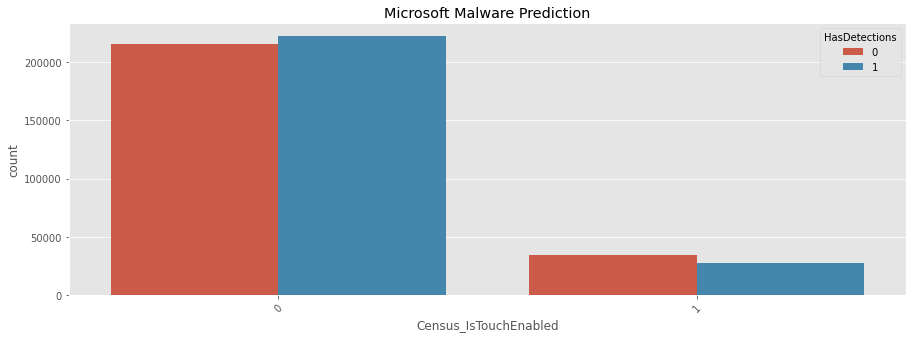

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_IsTouchEnabled', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_IsPenCapable

In [ ]:
df_mmp['Census_IsPenCapable'].value_counts(dropna=False)

0    481128
1     18872
Name: Census_IsPenCapable, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

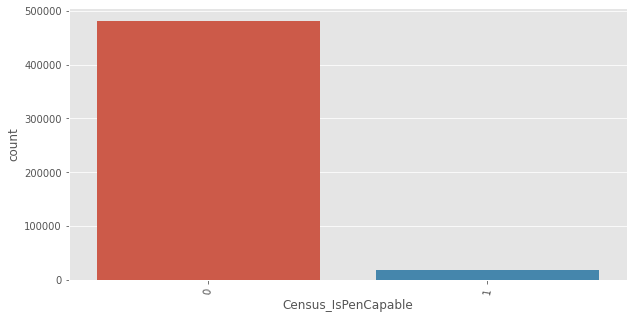

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df_mmp['Census_IsPenCapable'])
plt.xticks(rotation=80)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

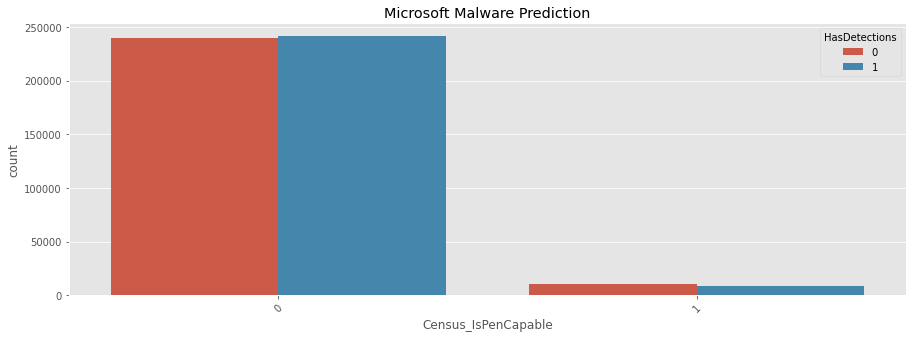

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_IsPenCapable', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

###Census_IsAlwaysOnAlwaysConnectedCapable

In [ ]:
df_mmp['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts(dropna=False)

0.0    467569
1.0     28391
NaN      4040
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

Text(0.5, 1.0, 'Microsoft Malware Prediction')

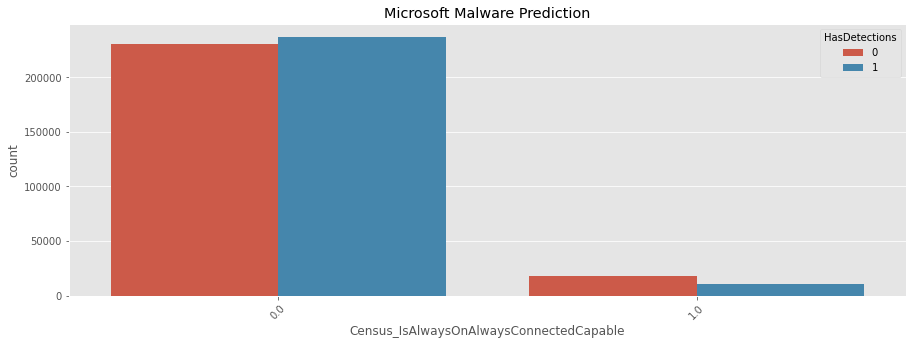

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Census_IsAlwaysOnAlwaysConnectedCapable', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:

df_mmp['Census_IsAlwaysOnAlwaysConnectedCapable'] = df_mmp['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(-1)

###Wdft_IsGamer

In [ ]:
df_mmp['Wdft_IsGamer'].value_counts(dropna=False)

0.0    345835
1.0    137215
NaN     16950
Name: Wdft_IsGamer, dtype: int64

In [ ]:
df_mmp['Wdft_IsGamer'] = df_mmp['Wdft_IsGamer'].fillna(-1)

Text(0.5, 1.0, 'Microsoft Malware Prediction')

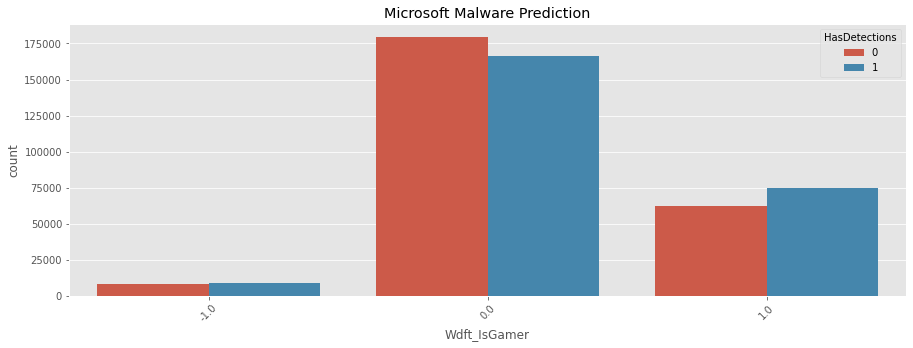

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_mmp, x= 'Wdft_IsGamer', hue = TARGET)
plt.xticks(rotation=45)
plt.title('Microsoft Malware Prediction')

In [ ]:
#ESTA VARIABLE NOS INDICA QUE SI UNA COMPUTADORA ES GAMER DETECTA UN POCO MAS QUE AQUELLA QUE NO ES


In [ ]:
df_mmp.columns

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition',
       'IsProtected', 'IeVerIdentifier', 'SmartScreen', 'Firewall',
       'Census_MDC2FormFactor', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'C

In [ ]:
df_mmp.shape

(500000, 67)

In [ ]:
df_mmp.select_dtypes(include = np.number).isnull().sum()

IsSxsPassiveMode                           0
AVProductsInstalled                        0
AVProductsEnabled                          0
HasTpm                                     0
IsProtected                                0
Firewall                                   0
Census_HasOpticalDiskDrive                 0
Census_ThresholdOptIn                      0
Census_IsSecureBootEnabled                 0
Census_IsWIMBootEnabled                    0
Census_IsTouchEnabled                      0
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
HasDetections                              0
dtype: int64

In [ ]:
df_mmp.select_dtypes(exclude = np.number).isnull().sum()

ProductName                                          0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
RtpStateBitfield                                     0
AVProductStatesIdentifier                            0
CountryIdentifier                                    0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsBuild                                              0
OsSuite                                              0
OsPlatformSubRelease                                 0
OsBuildLab                                           0
SkuEdition                                           0
IeVerIdentifier                                      0
SmartScree

#Listas de variables

#####Aquí desarolle las listas de los tipos de variables como una forma de organizacion 

In [ ]:
'''def obtener_lista_variables(dataset):
  lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object" or  dataset[i].dtype=="category")  and i not in TARGET:
              lista_categoricas.append(i)
        else :
          print(i)
          print('type ', dataset[i].dtype)
                
    return lista_numericas, lista_boolean, lista_categoricas'''

'def obtener_lista_variables(dataset):\n  lista_numericas=[]\n    lista_boolean=[]\n    lista_categoricas=[]\n\n    for i in dataset:\n        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in TARGET:\n              lista_numericas.append(i)\n        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())== 2  and i not in TARGET:\n              lista_boolean.append(i)\n        elif  (dataset[i].dtype=="object" or  dataset[i].dtype=="category")  and i not in TARGET:\n              lista_categoricas.append(i)\n        else :\n          print(i)\n          print(\'type \', dataset[i].dtype)\n                \n    return lista_numericas, lista_boolean, lista_categoricas'

In [ ]:
df_mmp.shape

(500000, 67)

In [ ]:
lista_categoricas_ord = ['EngineVersion',
                        'AppVersion',
                                                'AvSigVersion',
                         'Census_OSVersion',
                         'RtpStateBitfield',
                         'Census_ProcessorCoreCount',
                         'Census_PrimaryDiskTotalCapacity',
                        
                         'Census_TotalPhysicalRAM',
                         'Census_OSBuildRevision',
                         'Census_OSBuildNumber',
                         'Census_InternalBatteryNumberOfCharges'
                                   ]

In [ ]:
lista_numericas = ['AVProductsInstalled',
                   'AVProductsEnabled','Census_ThresholdOptIn',
                   'Census_IsAlwaysOnAlwaysConnectedCapable'
                  ]

In [ ]:
lista_booleanas = [ 'IsSxsPassiveMode',
                  'IsProtected',
                   'Firewall',
                   'Census_HasOpticalDiskDrive', 
                                                         
                   'Census_IsSecureBootEnabled',
                   'Census_IsWIMBootEnabled',
                                      'Census_IsTouchEnabled',
                  'HasTpm',
                                      'Census_IsPenCapable'
                   ]

In [ ]:
len(lista_booleanas)

9

In [ ]:
lista_categoricas_nom = [x for x in df_mmp.columns if x not in lista_numericas and x not in lista_booleanas and x not in lista_categoricas_ord and x != TARGET]
                         


In [ ]:
lista_categoricas = lista_categoricas_ord + lista_categoricas_nom

In [ ]:
len(lista_categoricas_nom)

42

In [ ]:
len(lista_categoricas_ord)

11

In [ ]:
len(lista_numericas)

4

In [ ]:
len(lista_booleanas)

9

In [ ]:
df_mmp.shape

(500000, 67)

#2.2 Analisis multivariante de datos

In [ ]:
corr = df_mmp.corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,IsSxsPassiveMode,AVProductsInstalled,AVProductsEnabled,HasTpm,IsProtected,Firewall,Census_HasOpticalDiskDrive,Census_ThresholdOptIn,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
IsSxsPassiveMode,1.000000,0.193148,0.028967,0.013870,-0.030222,0.005568,0.010481,-0.011526,0.020660,-0.011230,-0.005630,-0.003095,-0.012222,0.033812,0.005401,-0.034038
AVProductsInstalled,0.193148,1.000000,0.318986,0.028885,0.015911,0.016186,0.028971,0.082991,0.212307,0.082950,-0.012216,-0.027040,-0.047959,0.057452,0.057827,-0.144367
AVProductsEnabled,0.028967,0.318986,1.000000,-0.033795,0.164417,-0.007043,0.002088,0.046020,0.036325,0.046285,-0.000034,-0.005735,-0.011647,0.005335,0.009002,-0.033887
HasTpm,0.013870,0.028885,-0.033795,1.000000,-0.000425,0.467010,0.005763,-0.059133,0.087262,-0.059253,0.028685,0.016639,0.027544,0.053995,-0.014404,0.007198
IsProtected,-0.030222,0.015911,0.164417,-0.000425,1.000000,0.015192,-0.009659,-0.048961,-0.034362,-0.049321,-0.000144,0.012623,0.004894,0.025056,-0.006637,0.057992
Firewall,0.005568,0.016186,-0.007043,0.467010,0.015192,1.000000,0.003505,-0.025522,0.074363,-0.025581,0.029296,0.016327,0.031378,0.025494,0.013419,0.002642
Census_HasOpticalDiskDrive,0.010481,0.028971,0.002088,0.005763,-0.009659,0.003505,1.000000,0.106845,-0.060760,0.107040,-0.055785,-0.037302,-0.043713,0.057617,0.013323,0.020073
Census_ThresholdOptIn,-0.011526,0.082991,0.046020,-0.059133,-0.048961,-0.025522,0.106845,1.000000,0.000548,0.997727,0.025018,-0.023467,0.030835,-0.043571,0.086466,-0.014730
Census_IsSecureBootEnabled,0.020660,0.212307,0.036325,0.087262,-0.034362,0.074363,-0.060760,0.000548,1.000000,0.000267,0.163588,0.122981,0.071285,-0.011068,0.040820,-0.002487
Census_IsWIMBootEnabled,-0.011230,0.082950,0.046285,-0.059253,-0.049321,-0.025581,0.107040,0.997727,0.000267,1.000000,0.024791,-0.023656,0.030068,-0.043810,0.086636,-0.014841


#3.1 Transformacion de variables




####Realicé OHE para todas las etiquetas categoricas, ya que agrupe a la mayoria de ellas con la formula que junta todas las etiquetas que contengan menos del 1% de los datos, porque de otra manera por ejemplo, con un frequency encoding estaria sobreponderando sobre las variables donde la etiqueta "others" quede mayor que las demas.




In [ ]:
df_t = df_mmp.copy()

In [ ]:
'''FUNCION PARA PASAR A BOOLEAN
#df_seguro_prep_cate=pd.get_dummies(data=df_seguro_prep,
                               prefix=None, 
                               prefix_sep="_",
                               columns=lista_categoricas2,
                               drop_first="True")'''

'FUNCION PARA PASAR A BOOLEAN\n#df_seguro_prep_cate=pd.get_dummies(data=df_seguro_prep,\n                               prefix=None, \n                               prefix_sep="_",\n                               columns=lista_categoricas2,\n                               drop_first="True")'

In [ ]:

def OHE(dataframe, col_name):
  _dummy_dataset = pd.get_dummies(dataframe[col_name], prefix = col_name)
  dataframe = pd.concat([dataframe,_dummy_dataset], axis = 1)
  return dataframe.drop([col_name], axis =1)

In [ ]:
for i in lista_categoricas_nom:
  num_etiquetas = len(df_t[i].value_counts())
  print(num_etiquetas)
  print(i)
  df_t = OHE(df_t, i)


2
ProductName
9
AVProductStatesIdentifier
32
CountryIdentifier
4
OrganizationIdentifier
28
GeoNameIdentifier
25
LocaleEnglishNameIdentifier
4
Platform
3
Processor
9
OsBuild
3
OsSuite
9
OsPlatformSubRelease
10
OsBuildLab
3
SkuEdition
14
IeVerIdentifier
5
SmartScreen
7
Census_MDC2FormFactor
15
Census_OEMNameIdentifier
5
Census_OEMModelIdentifier
3
Census_ProcessorManufacturerIdentifier
17
Census_ProcessorModelIdentifier
3
Census_PrimaryDiskTypeName
6
Census_ChassisTypeName
17
Census_InternalPrimaryDiagonalDisplaySizeInInches
9
Census_InternalPrimaryDisplayResolutionHorizontal
7
Census_InternalPrimaryDisplayResolutionVertical
5
Census_PowerPlatformRoleName
6
Census_InternalBatteryType
3
Census_OSArchitecture
8
Census_OSBranch
5
Census_OSEdition
5
Census_OSSkuName
9
Census_OSInstallTypeName
17
Census_OSInstallLanguageIdentifier
17
Census_OSUILocaleIdentifier
6
Census_OSWUAutoUpdateOptionsName
4
Census_GenuineStateName
5
Census_ActivationChannel
2
Census_FlightRing
14
Census_FirmwareManufac

In [ ]:
df_t.shape

(500000, 401)

##Ordinal encoding para categoricas ordinales

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def ord_encode(df, column):
  enc = OrdinalEncoder()
  # transforming the column after fitting
  enc = enc.fit_transform(df[[column]])
  # concating dataframes 
  df[column]= enc
  # removing the encoded column.
  return df 

  

In [ ]:
for i in lista_categoricas_ord:
  num_etiquetas = len(df_t[i].value_counts())
  print(num_etiquetas)
  print(i)
  df_t = ord_encode(df_t, i)

4
EngineVersion
10
AppVersion
8
AvSigVersion
7
Census_OSVersion
3
RtpStateBitfield
5
Census_ProcessorCoreCount
15
Census_PrimaryDiskTotalCapacity
8
Census_TotalPhysicalRAM
24
Census_OSBuildRevision
7
Census_OSBuildNumber
3
Census_InternalBatteryNumberOfCharges


In [ ]:
df_t.shape


(500000, 401)

In [ ]:
df_mmp.shape

(500000, 67)

## Escalar variables 

####Defino X para las variables e y para el TARGET 

In [ ]:
X = df_t.drop(TARGET, axis=1)
y = df_t[TARGET]

In [ ]:
X= X_df
y= y_df

In [ ]:
X.shape

(500000, 400)

In [ ]:
y.shape

(500000,)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X)

In [ ]:
X = scaler.transform(X)

In [ ]:
X

array([[1.        , 0.77777778, 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.77777778, 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.85714286, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.44444444, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.55555556, 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.77777778, 0.85714286, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df_t[X]=minMaxResultado.fit_transform(df_t[X].values.reshape(-1,1))

#4.1 Partición y muestreo del dataset

#####La particion será aleatoria con un random state de 42 y un test size de 20%

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
# split train, test for calibration
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state= 42)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (350000, 400) (350000,)
Set de Prueba: (150000, 400) (150000,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

#####El modelo a realizar será un Decision Tree

#4.2 Evaluación de algoritmos

In [ ]:
#1.instanciar el modelo
dt = DecisionTreeClassifier(criterion="gini",
                      max_depth= 15, #cantidad de preguntas que permitimos
                      min_samples_split= 0.002, #cantidad minima de obs en corte
                      random_state= 42)

In [ ]:
#Entrenar el modelo
dt.fit(
    X_train, y_train
)

DecisionTreeClassifier(max_depth=15, min_samples_split=0.002, random_state=42)

In [ ]:
text_tree = export_graphviz(
    
    decision_tree = dt,
    out_file=None,
    #max_depth=None,
    feature_names=X_train.columns,
    class_names=['No Detections ','Has Detections'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True,
    precision=3
)

AttributeError: ignored

In [ ]:
graphviz.Source(text_tree)

In [ ]:
df_mmp[TARGET].value_counts()

0    250047
1    249953
Name: HasDetections, dtype: int64

#5.1 Optimización de modelos

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index = y_test.index, columns = ['Malware Predictions'])

Confusion Matrix:
[[0.59052298 0.40947702]
 [0.33580356 0.66419644]]


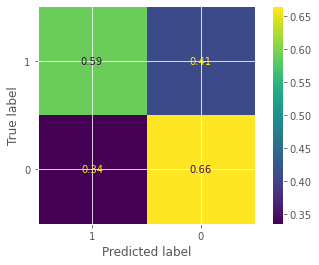

In [ ]:
#confusion matrix
print('Confusion Matrix:')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0], normalize="true")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot()
        

#####La confusion matrix nos muestra la cantidad de true positives, true negatives, false positives y false negatives que predijo el modelo.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.6273066666666667

###5.1.1 Optimización de hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

cv = 2
def optimizar_params(clf, tuned_parameters, scores, cv):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            clf, tuned_parameters, scoring=score, cv=cv
        )
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        
        #confusion matrix
        print('Confusion Matrix:')
        from sklearn.metrics import confusion_matrix
        
        cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
        print(cm)

        return clf.best_params_

In [ ]:
tuned_parameters = [{
                      "criterion": ["gini"],
                      "max_depth": [5, 10, 15, 20], #cantidad de preguntas que permitimos
                      "min_samples_split": [0.10, 0.05, 0.002], #cantidad minima de obs en corte
                      "random_state": [42],
                     }]

scores = ["accuracy"]

clf = DecisionTreeClassifier()
optimizar_params(clf, tuned_parameters, scores, cv)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.002, 'random_state': 42}

Grid scores on development set:

0.613 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.1, 'random_state': 42}
0.614 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.05, 'random_state': 42}
0.614 (+/-0.001) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.002, 'random_state': 42}
0.621 (+/-0.000) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.1, 'random_state': 42}
0.621 (+/-0.000) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.05, 'random_state': 42}
0.625 (+/-0.001) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 0.002, 'random_state': 42}
0.621 (+/-0.000) for {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 0.1, 'random_state': 42}
0.622 (+/-0.001) for {'criterion': 'gini', 'max

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 0.002,
 'random_state': 42}

In [ ]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.5719828571428571 - Test: 0.5705733333333334
Profundidad del árbol: 2. Train: 0.5879457142857143 - Test: 0.59024
Profundidad del árbol: 3. Train: 0.6072171428571429 - Test: 0.60652
Profundidad del árbol: 4. Train: 0.6072171428571429 - Test: 0.60652
Profundidad del árbol: 5. Train: 0.6151428571428571 - Test: 0.6132933333333334
Profundidad del árbol: 6. Train: 0.6186257142857143 - Test: 0.61674
Profundidad del árbol: 7. Train: 0.6216828571428571 - Test: 0.61886
Profundidad del árbol: 8. Train: 0.6262742857142857 - Test: 0.6215333333333334
Profundidad del árbol: 9. Train: 0.6301142857142857 - Test: 0.6237533333333334
Profundidad del árbol: 10. Train: 0.6368257142857143 - Test: 0.6264266666666667
Profundidad del árbol: 11. Train: 0.6434771428571429 - Test: 0.62808
Profundidad del árbol: 12. Train: 0.6502514285714286 - Test: 0.6271133333333333
Profundidad del árbol: 13. Train: 0.6575914285714286 - Test: 0.6272466666666666
Profundidad del árbol: 14. Train: 0

###5.3 Recalibrado

In [ ]:
#A partir de las pruebas realizadas sobre el modelo para obtener el mejor accuracy y no hacer overfitting sobre la validacion, modificaré a los parametros sugeridos.

In [ ]:
#1.instanciar el modelo
dt = DecisionTreeClassifier(criterion="gini",
                      max_depth= 10, #cantidad de preguntas que permitimos
                      min_samples_split= 0.002, #cantidad minima de obs en corte
                      random_state= 42)

In [ ]:
#Entrenar el modelo
dt.fit(
    X_train, y_train
)

DecisionTreeClassifier(max_depth=10, min_samples_split=0.002, random_state=42)

In [ ]:
text_tree = export_graphviz(
    
    decision_tree = dt,
    out_file=None,
    #max_depth=None,
    feature_names=X_train.columns,
    class_names=['No Detections ','Has Detections'],
    filled=True,
    impurity=True,
    proportion=True,
    rotate=True,
    rounded=True,
    precision=3
)

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index = y_test.index, columns = ['Malware Predictions'])

In [ ]:
accuracy_score(y_test, y_test_pred)

0.6273066666666667

#6.1 Análisis y presentación de resultados

#####Analizando el arbol de regresión puedo ver cuales son las variables de mayor importancia para el modelo, a partir de las cuales el algoritmo realizó preguntas y obtendrá las predicciones. La primera variable, el nodo raíz es SmartScreen_ExistNotSet donde tenemos el 100% del set de datos. Como se puede visualizar, el Gini allí es mayor, por lo que hay menor pureza, mas heterogeneidad de datos.